# **Build Piecewise and Spline Regression Models in Python**
In this Regression Project, you will learn how to build a piecewise and spline regression model from scratch in Python to predict the points scored by a sports team.




## Problem Overview

The problem statement entails forecasting the points won by a sports team based on their training performance, which fundamentally includes features such as the number of yoga sessions attended, the number of laps done, water intake, weightlifting sessions, and so on. The machine learning solution to the problem statement would allow key stakeholders to monitor and enhance the team's training performance.

Polynomial regression is a form of regression analysis in which the relationship between
the dependent variable and independent variable is mapped using n
th degree
polynomial. If we apply linear regression to the linear dataset, then it gives good results.
On the other hand, if we apply linear regression to non-linear data then the results are
drastic. So, for such cases, we need polynomial regression which will capture the
non-linear relationship in the data. Hence, in polynomial regression, the original features
are converted into polynomial features of the required degree and modeled using the
linear model.


This project involves implementing Piecewise Regression and various Spline Regression techniques to improvise the previous results.


Piecewise Regression, also known as segmented regression, is a regression analysis approach in which the independent variable is partitioned into intervals and each interval is fitted with different linear functions. The rationale behind piecewise linear regression is that if the data exhibits various linear trends over different portions of the data, the overall regression function can be modeled in multiple "pieces."

![Piecewise Regression](https://d3i71xaburhd42.cloudfront.net/42a366b2157fedb6fdf823f2c0391c0f55d2f586/3-Figure3-1.png)

Reference - Piecewise regression for determining Malaysian woman foot shape
Mohd Salzahrin Mohd Hamzah, O. M. Rijal, +1 author N. Noor
Published 2017





Spline Regression or spline interpolation produces a piecewise continuous function made up of several polynomial regression functions.
The project offers a thorough explanation of the mathematics underlying these concepts.



![Spline Regression](https://d3i71xaburhd42.cloudfront.net/3d1080363d3673d210ace634266917eeebe13f78/38-Figure2.1-1.png)

Reference - Kriner, M. (2007). Survival Analysis with Multivariate adaptive Regression Splines.



- What is a Step function?
- What is the Heaviside function?
- What are the limitations of Polynomial Regression?
- What is Piecewise Regression?
- How is Piecewise Regression implemented in Python?
- What is Log-Likelihood?
- What are Adaptive Subdivision and Sequential Search?
- Understanding Davies Test
- What are Basis Functions?
- Why are Basis Functions important?
- How are Basis Functions implemented in Python?
- What are Splines?
- How do we overcome the limitations of Piecewise Regression with Splines?
- What are Degrees of Freedom?
- What are B-splines?
- What are Cubic Splines?
- Understanding Bernstein Polynomials and Weierstrass Transforms
- How is Spline Regression implemented in Python?
- What are Multivariate Adaptive Regression Splines (MARS)?
- MARS Implementation in Python

# **Aim**

To predict points scored by the sports team using piecewise and spline regression.




# **Data Description**

The dataset contains information about the points scored by sports teams based on various attributes.




# **Tech Stack**

Language: Python

Libraries:  pandas, numpy, scipy, matplotlib, seaborn, sklearn, statsmodels, piecewise_regression, csaps, py-earth, mlfoundry




# **Approach**

Data Reading

Data Preprocessing

Outlier Removal

One Hot Encoding

Imputing Missing Values

Model Building

Linear Regression

Polynomial Regression

Step Functions

Piecewise Regression

Basis Functions

Spline Regression

Univariate Model

Bivariate Model

Multivariate Adaptive Regression Splines (MARS) Model

Model Evaluation and Comparison

### Install Dependencies

In [ ]:

# !pip install matplotlib==3.4.3
# !pip install numpy==1.21.5
# !pip install pandas==1.3.5
# !pip install scikit_learn==1.0.2
# !pip install seaborn==0.11.2
# !pip install statsmodels==0.13.2
# !pip install tqdm==4.62.3
# !pip install catboost==1.0.4
# !pip install category_encoders==2.4.0
# !pip install japanize_matplotlib==1.1.3
# !pip install matplotlib_venn==0.11.6
# !pip install packaging==21.3
# !pip install xgboost==1.5.2
# !pip install ipywidgets==7.7.0
# !pip install lightgbm==3.3.2
# !pip install mlfoundry==0.4.10
# !pip install piecewise_regression==1.2.1
# !pip install pymc3==3.11.5
# !pip install arviz==0.12.1
# !pip install csaps==1.1.0

### Data Reading and Exploration

In [ ]:
#importing necessary libraries

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")


#reading data
data=pd.read_csv("../input/NBA_Dataset_csv.csv")

In [ ]:
# head
data.head()

Team  Points_Scored  Weightlifting_Sessions_Average  \
0  Lakers            242                            23.0   
1  Lakers            144                            24.0   
2  Lakers            156                            24.0   
3  Lakers            159                            26.0   
4  Lakers            106                            27.0   

   Yoga_Sessions_Average  Laps_Run_Per_Practice_Average  Water_Intake  \
0                   25.0                           30.0           5.0   
1                   26.0                           31.0           5.0   
2                   27.0                           31.0           5.0   
3                   29.0                           34.0           5.0   
4                    NaN                           34.0           5.0   

   Players_Absent_For_Sessions  
0                          4.0  
1                          8.0  
2                          7.0  
3                          1.0  
4                          6.0

In [ ]:
# shape of the dataset
print("Dimension of the dataset is= ",data.shape)

Dimension of the dataset is=  (159, 7)


In [ ]:
#columns of data
data.columns

Index(['Team', 'Points_Scored', 'Weightlifting_Sessions_Average',
       'Yoga_Sessions_Average', 'Laps_Run_Per_Practice_Average',
       'Water_Intake', 'Players_Absent_For_Sessions'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Team                            159 non-null    object 
 1   Points_Scored                   159 non-null    int64  
 2   Weightlifting_Sessions_Average  150 non-null    float64
 3   Yoga_Sessions_Average           139 non-null    float64
 4   Laps_Run_Per_Practice_Average   145 non-null    float64
 5   Water_Intake                    145 non-null    float64
 6   Players_Absent_For_Sessions     130 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 8.8+ KB


In [ ]:
#renaming required columns
df=data.rename(columns={'Points_Scored':'Points','Weightlifting_Sessions_Average':'WL','Yoga_Sessions_Average':'Yoga',
                        'Laps_Run_Per_Practice_Average':'Laps','Water_Intake':'WI',
                        'Players_Absent_For_Sessions':'PAFS'})

In [ ]:
df.head()

Team  Points    WL  Yoga  Laps   WI  PAFS
0  Lakers     242  23.0  25.0  30.0  5.0   4.0
1  Lakers     144  24.0  26.0  31.0  5.0   8.0
2  Lakers     156  24.0  27.0  31.0  5.0   7.0
3  Lakers     159  26.0  29.0  34.0  5.0   1.0
4  Lakers     106  27.0   NaN  34.0  5.0   6.0

### Exploratory Data Analysis

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

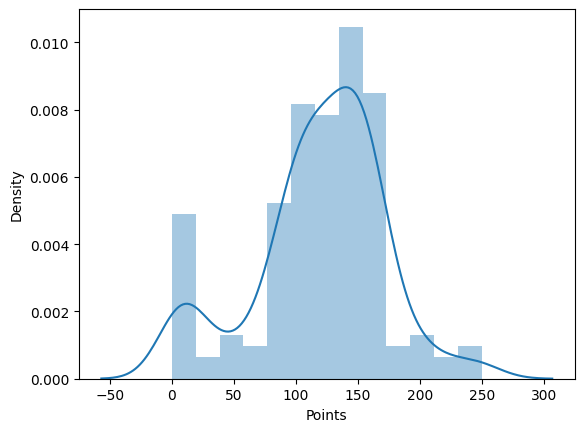

In [ ]:
#DistPlot
#sns.displot(df.Points) --> use this if the below code gives error
ax=sns.distplot(df.Points)

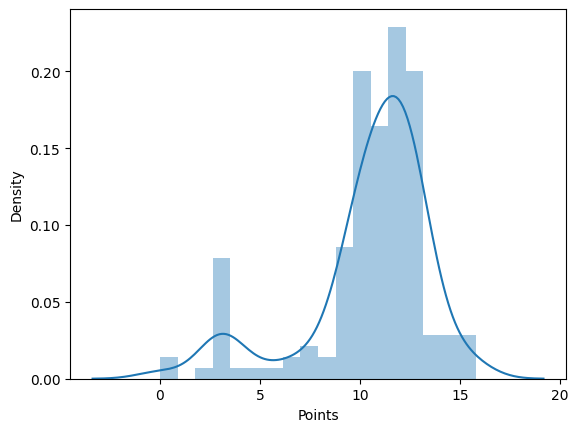

In [ ]:
#distplot can be replaced with displot
ax=sns.distplot(np.sqrt(df.Points))

<AxesSubplot:xlabel='Points'>

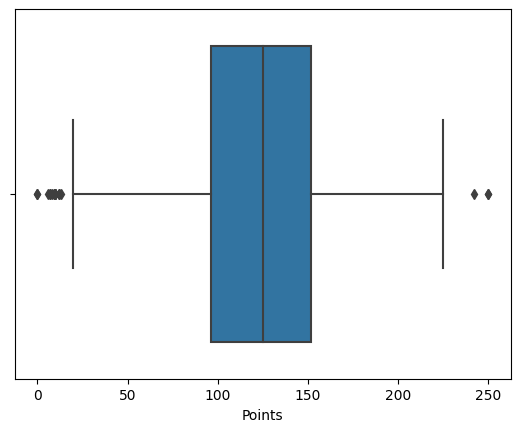

In [ ]:
#boxplot visualization
sns.boxplot(df.Points)

In [ ]:
df.tail(100)

Team  Points    WL  Yoga  Laps   WI  PAFS
59   Clippers     156  34.0  28.0  40.0  5.0   5.0
60   Clippers     122  37.0  29.0  44.0  5.0   2.0
61   Warriors      55  14.0   8.0  17.0  3.0   3.0
62   Warriors      60  14.0   8.0  17.0  3.0   4.0
63   Warriors      90  16.0  11.0  20.0  3.0   7.0
..        ...     ...   ...   ...   ...  ...   ...
154     Bulls      12  12.0  12.0  13.0  1.0   NaN
155     Bulls      13  12.0  12.0  14.0  1.0   NaN
156     Bulls      12  12.0  13.0  14.0  1.0   NaN
157     Bulls      20  13.0  14.0  15.0  1.0   6.0
158     Bulls       0  14.0  15.0  16.0  1.0   5.0

[100 rows x 7 columns]

In [ ]:
#function for plotting violin plots
def plotting_box_violin_plots(df,x,y):
  fig,axes=plt.subplots(1,2,figsize=(18,10))
  fig.suptitle("Violin and box plots for variable : {}".format(y))

  sns.violinplot(ax=axes[0],x=x,y=y,data=df)
  sns.boxplot(ax=axes[1],data=df[y])

  axes[0].set_title("Violin plot for variable : {}".format(y))
  axes[1].set_title("Box plot for variable : {}".format(y))



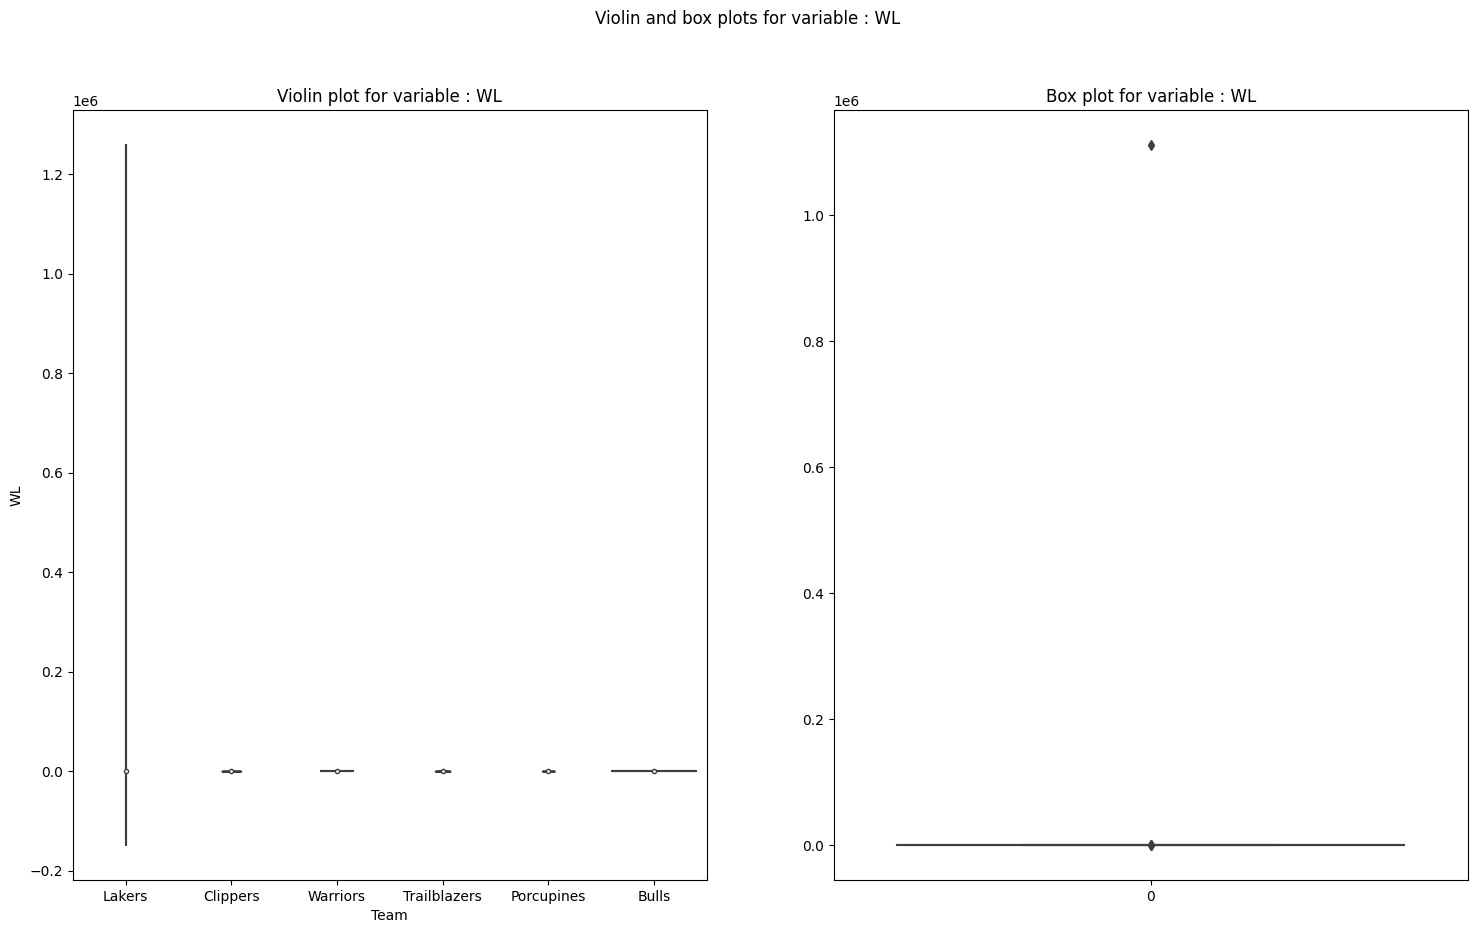

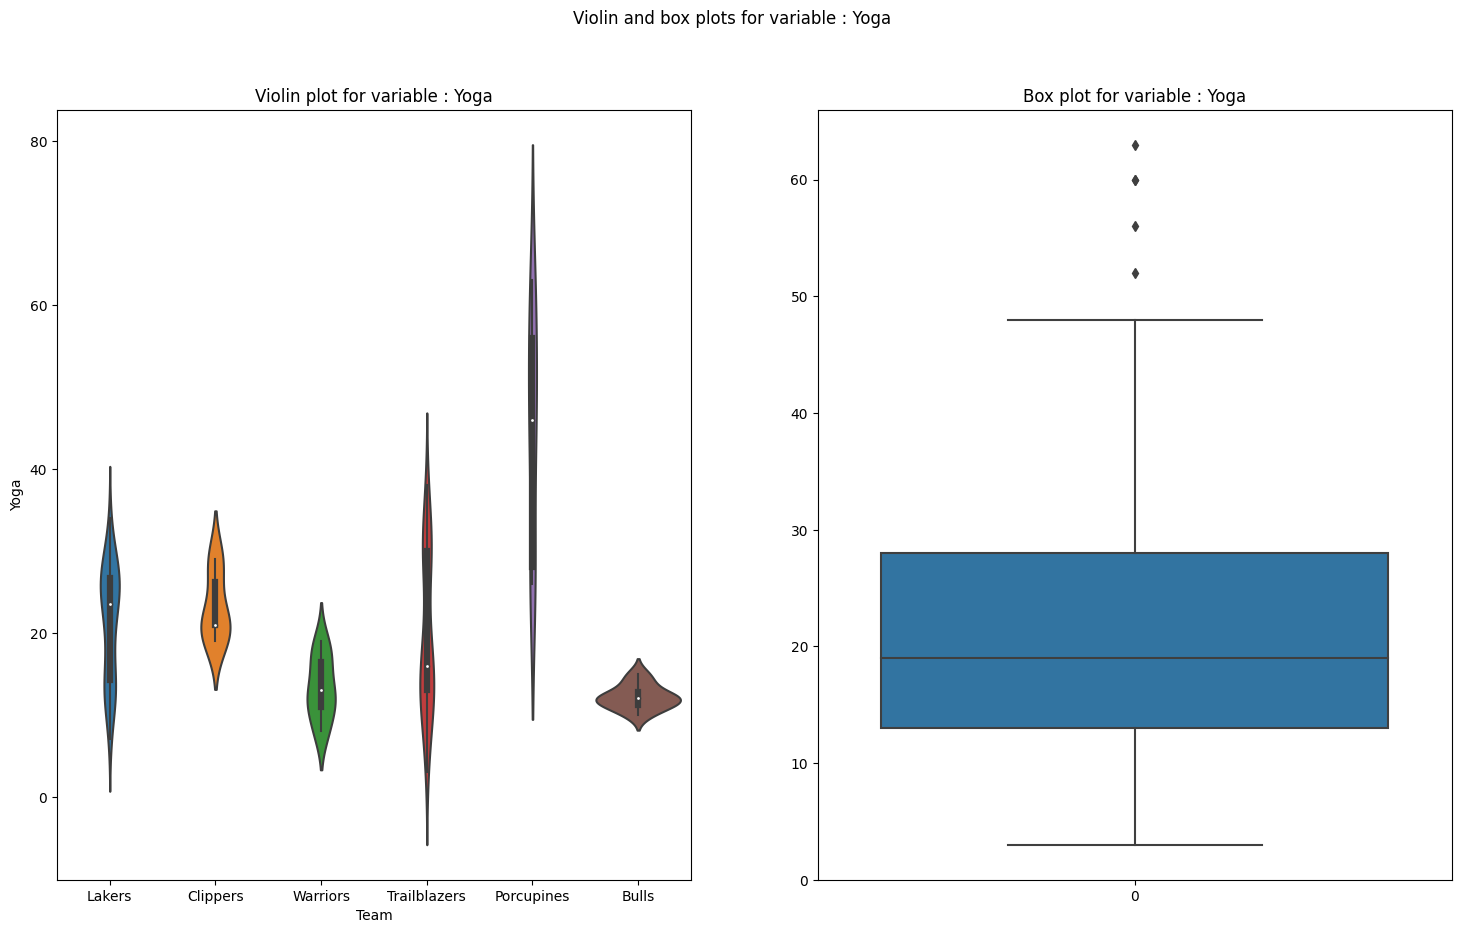

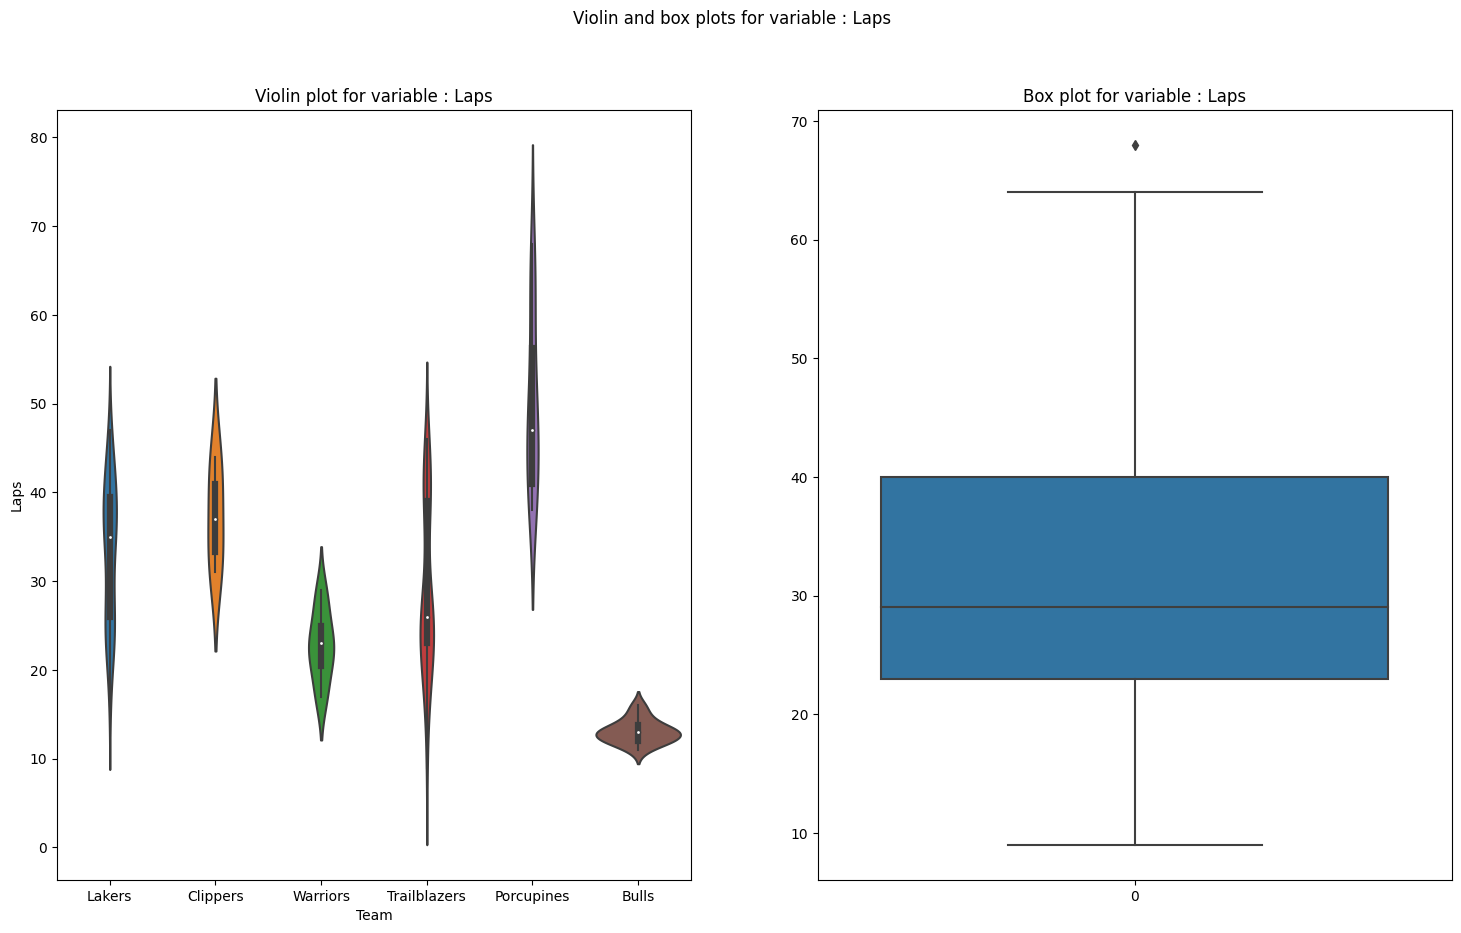

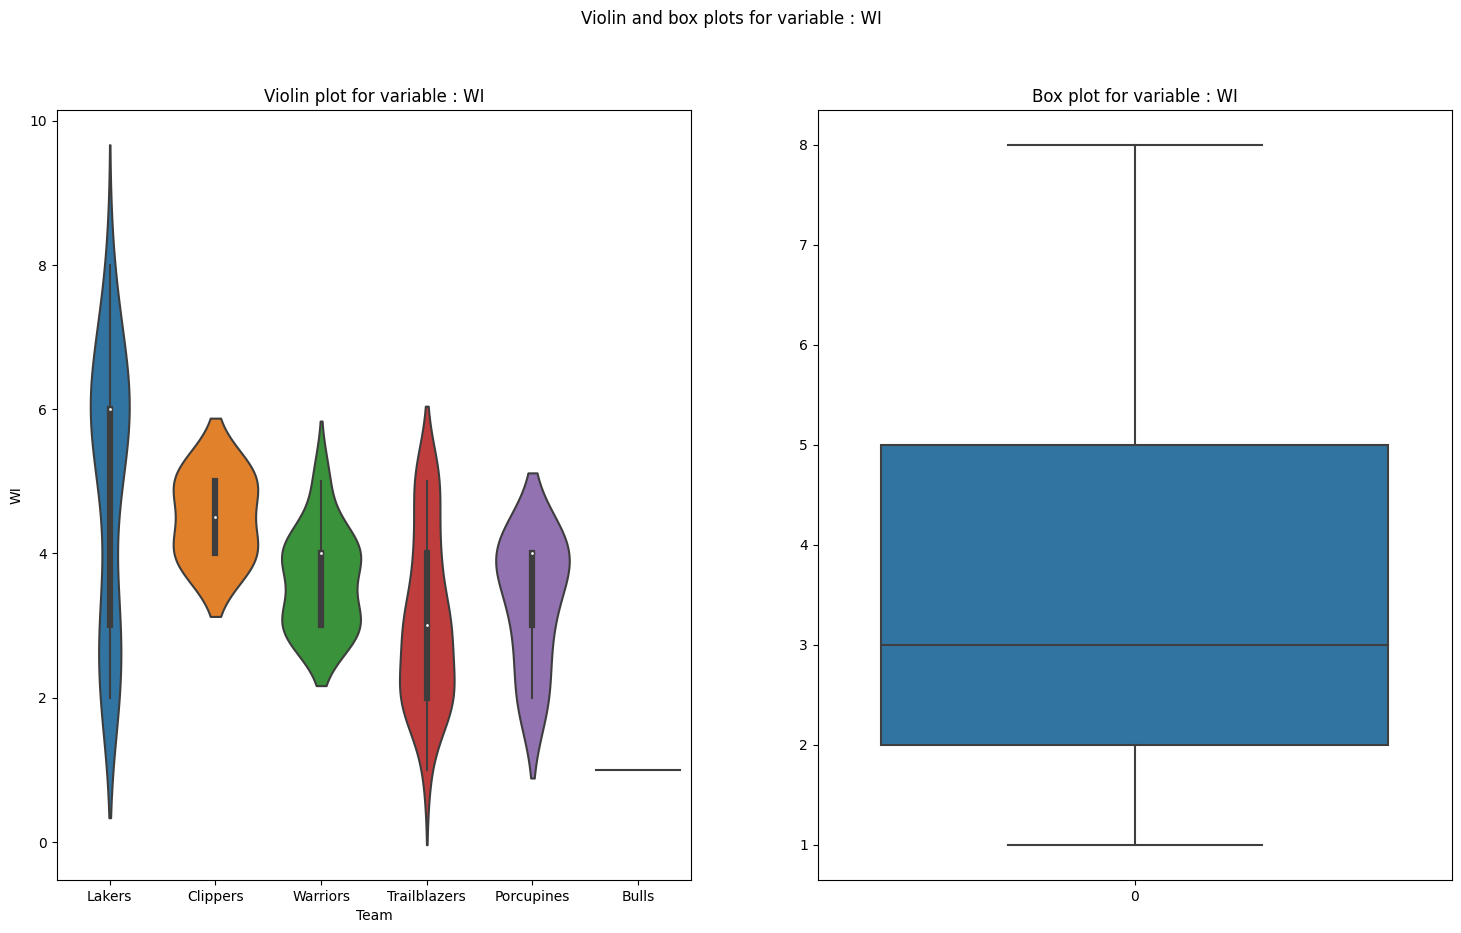

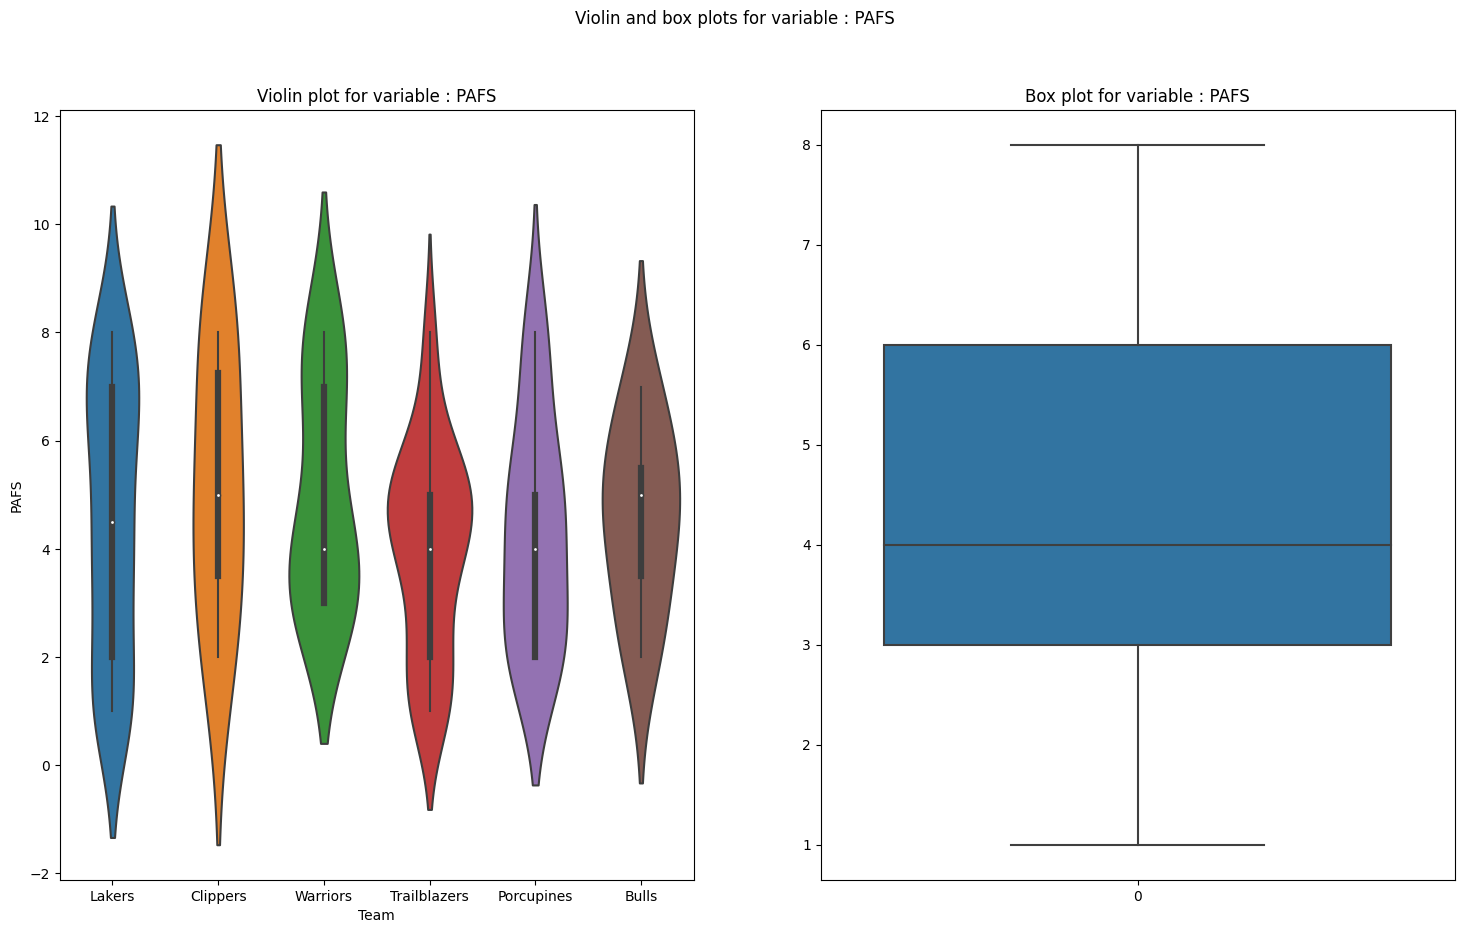

In [ ]:
for x in ['WL','Yoga','Laps','WI','PAFS']:
  plotting_box_violin_plots(df,"Team",x)

In [ ]:
#function for finding out outliers
def find_outliers(df,column):
  Q1=df[column].quantile(0.25)
  Q3=df[column].quantile(0.75)
  IQR=Q3-Q1
  Upper_End=Q3+1.5*IQR
  Lower_End=Q1-1.5*IQR

  outlier=df[column][(df[column]>Upper_End)| (df[column]<Lower_End) ]

  return outlier

In [ ]:
for column in ['WL','Yoga','Laps','WI','PAFS']:
  print('\n Outliers in column "%s"' %column)

  outlier= find_outliers(df,column)
  print(outlier)


 Outliers in column "WL"
8      1111111.0
142         56.0
143         56.0
144         59.0
Name: WL, dtype: float64

 Outliers in column "Yoga"
140    52.0
141    56.0
142    60.0
143    60.0
144    63.0
Name: Yoga, dtype: float64

 Outliers in column "Laps"
144    68.0
Name: Laps, dtype: float64

 Outliers in column "WI"
Series([], Name: WI, dtype: float64)

 Outliers in column "PAFS"
Series([], Name: PAFS, dtype: float64)


In [ ]:
#removing outliers
df_clean=df.drop([142,143,144])

In [ ]:
df_clean.shape

(156, 7)

In [ ]:
df_clean['WL'][df_clean['WL']==1111111.0]=np.nan

In [ ]:
df_clean['WL']

0      23.0
1      24.0
2      24.0
3      26.0
4      27.0
       ... 
154    12.0
155    12.0
156    12.0
157    13.0
158    14.0
Name: WL, Length: 156, dtype: float64

### Imputation Techniques


In [ ]:
ncounts=pd.DataFrame([df_clean.isna().mean()]).T

In [ ]:
ncounts=ncounts.rename(columns={1:'data_missing'})

In [ ]:
ncounts

0
Team    0.000000
Points  0.000000
WL      0.064103
Yoga    0.128205
Laps    0.089744
WI      0.089744
PAFS    0.185897

<AxesSubplot:title={'center':'% of missing values across each column'}>

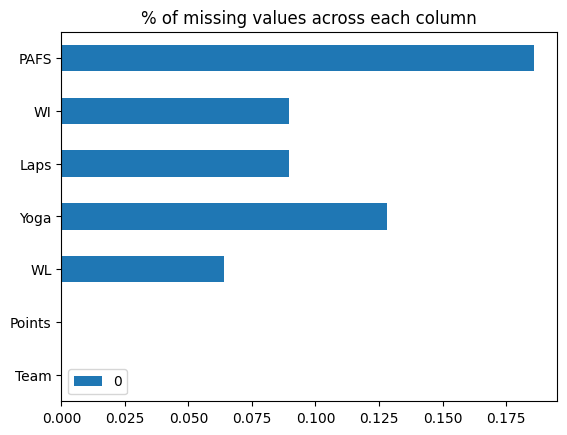

In [ ]:
#plot of missing value in each column
ncounts.plot(kind='barh',title='% of missing values across each column')

In [ ]:
####
# 1. Pandas Way -> F fill and B fill, groupby
# 2. Sklearn -> Imputer -> Simple, Iterative, KNN
# 3. LGBM -> To fill in the missing values

In [ ]:
df_clean.shape, df_clean.dropna(axis=0).shape

((156, 7), (94, 7))

In [ ]:
df_clean.shape, df_clean.dropna(axis=1).shape

((156, 7), (156, 2))

#Lets start with Pandas Imputer


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 158
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Team    156 non-null    object 
 1   Points  156 non-null    int64  
 2   WL      146 non-null    float64
 3   Yoga    136 non-null    float64
 4   Laps    142 non-null    float64
 5   WI      142 non-null    float64
 6   PAFS    127 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 9.8+ KB


In [ ]:
#filling missing values with -1
df_clean['WL'].fillna(-1)

0      23.0
1      24.0
2      24.0
3      26.0
4      27.0
       ... 
154    12.0
155    12.0
156    12.0
157    13.0
158    14.0
Name: WL, Length: 156, dtype: float64

<AxesSubplot:xlabel='WL', ylabel='Density'>

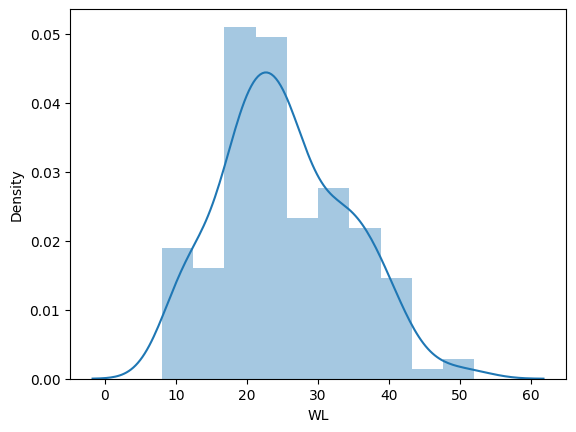

In [ ]:
#visualizing after filling missing value with mean
sns.distplot(df_clean['WL'].fillna(df_clean['WL'].mean()))

<AxesSubplot:xlabel='WL', ylabel='Density'>

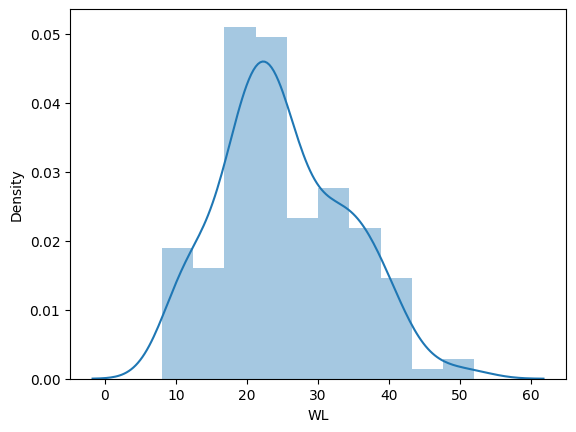

In [ ]:
#visualizing after filling missing value with median
sns.distplot(df_clean['WL'].fillna(df_clean['WL'].median()))

In [ ]:
#Groupby team

mean_WL=df_clean.groupby("Team")['WL'].mean().to_dict()

In [ ]:
mean_WL

{'Bulls': 11.214285714285714,
 'Clippers': 29.0,
 'Lakers': 26.04255319148936,
 'Porcupines': 39.42857142857143,
 'Trailblazers': 25.425925925925927,
 'Warriors': 18.727272727272727}

In [ ]:
WL_series= df_clean['WL'].replace(mean_WL)

<AxesSubplot:xlabel='WL', ylabel='Density'>

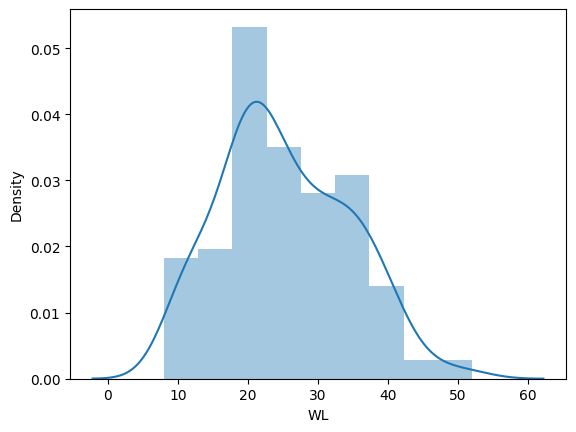

In [ ]:
sns.distplot(df_clean['WL'].replace(mean_WL))

In [ ]:
df_clean['WL'].replace(mean_WL)

0      23.0
1      24.0
2      24.0
3      26.0
4      27.0
       ... 
154    12.0
155    12.0
156    12.0
157    13.0
158    14.0
Name: WL, Length: 156, dtype: float64

In [ ]:
#you can use this function too
# df_clean['WL']=df_clean.groupby('Team')['WL'].transform(lambda x:x.fillna(x.mean()))




#Sklearn Imputer

In [ ]:
# 1 Simple Imputer

Features=['WL','Yoga','Laps','WI','PAFS']

from sklearn.impute import SimpleImputer
impt=SimpleImputer(strategy='mean')

#Fit & Transform

si_impt=impt.fit_transform(df_clean[Features])
si_impt_df=pd.DataFrame(si_impt,columns=Features)

si_impt_df

WL       Yoga  Laps   WI      PAFS
0    23.0  25.000000  30.0  5.0  4.000000
1    24.0  26.000000  31.0  5.0  8.000000
2    24.0  27.000000  31.0  5.0  7.000000
3    26.0  29.000000  34.0  5.0  1.000000
4    27.0  20.823529  34.0  5.0  6.000000
..    ...        ...   ...  ...       ...
151  12.0  12.000000  13.0  1.0  4.417323
152  12.0  12.000000  14.0  1.0  4.417323
153  12.0  13.000000  14.0  1.0  4.417323
154  13.0  14.000000  15.0  1.0  6.000000
155  14.0  15.000000  16.0  1.0  5.000000

[156 rows x 5 columns]

In [ ]:
# Iterative Impute

from sklearn.experimental import enable_iterative_imputer

In [ ]:
from sklearn.impute import IterativeImputer

ITI=IterativeImputer(max_iter=10)

#Fit & Transform

ITI_impt=ITI.fit_transform(df_clean[Features])

ITI_impt_df=pd.DataFrame(ITI_impt,columns=Features)

ITI_impt_df

WL       Yoga  Laps   WI      PAFS
0    23.0  25.000000  30.0  5.0  4.000000
1    24.0  26.000000  31.0  5.0  8.000000
2    24.0  27.000000  31.0  5.0  7.000000
3    26.0  29.000000  34.0  5.0  1.000000
4    27.0  22.063002  34.0  5.0  6.000000
..    ...        ...   ...  ...       ...
151  12.0  12.000000  13.0  1.0  4.413163
152  12.0  12.000000  14.0  1.0  4.413298
153  12.0  13.000000  14.0  1.0  4.413450
154  13.0  14.000000  15.0  1.0  6.000000
155  14.0  15.000000  16.0  1.0  5.000000

[156 rows x 5 columns]

In [ ]:
# KNN Imputer

from sklearn.impute import KNNImputer

KNN=KNNImputer(n_neighbors=3)

#Fit & Transform

KNN_impt=KNN.fit_transform(df_clean[Features])

KNN_impt_df=pd.DataFrame(KNN_impt,columns=Features)

KNN_impt_df

WL       Yoga  Laps   WI      PAFS
0    23.0  25.000000  30.0  5.0  4.000000
1    24.0  26.000000  31.0  5.0  8.000000
2    24.0  27.000000  31.0  5.0  7.000000
3    26.0  29.000000  34.0  5.0  1.000000
4    27.0  22.666667  34.0  5.0  6.000000
..    ...        ...   ...  ...       ...
151  12.0  12.000000  13.0  1.0  4.666667
152  12.0  12.000000  14.0  1.0  5.333333
153  12.0  13.000000  14.0  1.0  6.000000
154  13.0  14.000000  15.0  1.0  6.000000
155  14.0  15.000000  16.0  1.0  5.000000

[156 rows x 5 columns]

In [ ]:
# clone this git repository for LGBM Imputer
!git clone https://github.com/analokmaus/kuma_utils.git

fatal: destination path 'kuma_utils' already exists and is not an empty directory.


In [ ]:
import sys
sys.path.append('kuma_utils/')

In [ ]:
from kuma_utils.preprocessing.imputer import LGBMImputer

In [ ]:
%%time
lgbm_itr=LGBMImputer(n_iter=100,verbose=True)

df_itr=lgbm_itr.fit_transform(df_clean[Features])


df_itr_df=pd.DataFrame(df_itr,columns=Features)

  0%|          | 0/5 [00:00<?, ?it/s]

CPU times: total: 641 ms
Wall time: 154 ms


In [ ]:
df_itr_df

WL       Yoga  Laps   WI      PAFS
0    23.0  25.000000  30.0  5.0  4.000000
1    24.0  26.000000  31.0  5.0  8.000000
2    24.0  27.000000  31.0  5.0  7.000000
3    26.0  29.000000  34.0  5.0  1.000000
4    27.0  24.357742  34.0  5.0  6.000000
..    ...        ...   ...  ...       ...
154  12.0  12.000000  13.0  1.0  3.805411
155  12.0  12.000000  14.0  1.0  3.805411
156  12.0  13.000000  14.0  1.0  3.953409
157  13.0  14.000000  15.0  1.0  6.000000
158  14.0  15.000000  16.0  1.0  5.000000

[156 rows x 5 columns]

In [ ]:
df_new=df_itr_df

### Univariate Analysis


In [ ]:
df_new.columns

Index(['WL', 'Yoga', 'Laps', 'WI', 'PAFS'], dtype='object')

<AxesSubplot:xlabel='WL', ylabel='Density'>

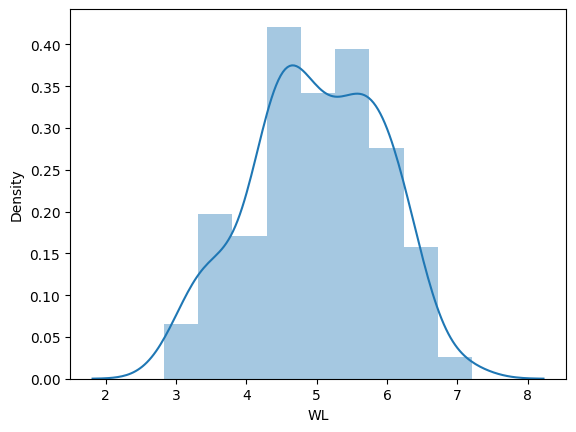

In [ ]:
#distribution plot
sns.distplot(np.sqrt(df_new["WL"]))

<AxesSubplot:xlabel='WL'>

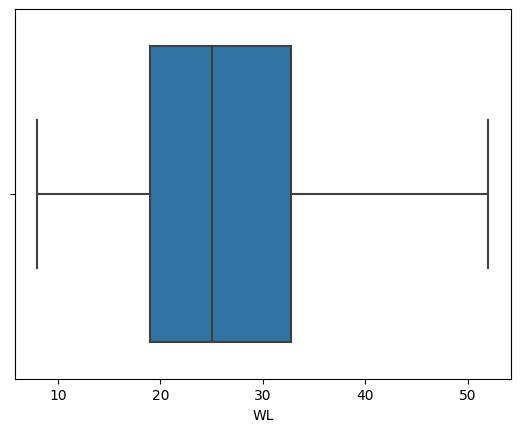

In [ ]:
#boxplot
sns.boxplot(df_new["WL"])

<AxesSubplot:>

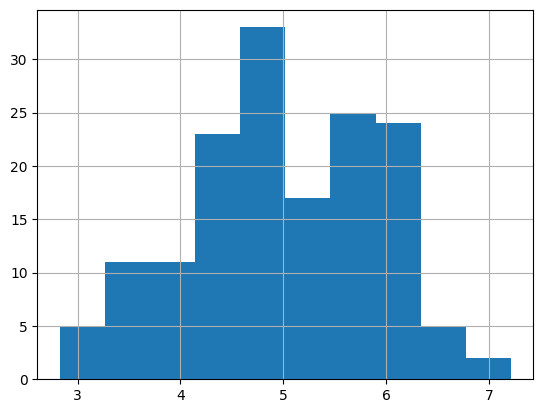

In [ ]:
#histogram plot
np.sqrt(df_new["WL"]).hist()

<AxesSubplot:>

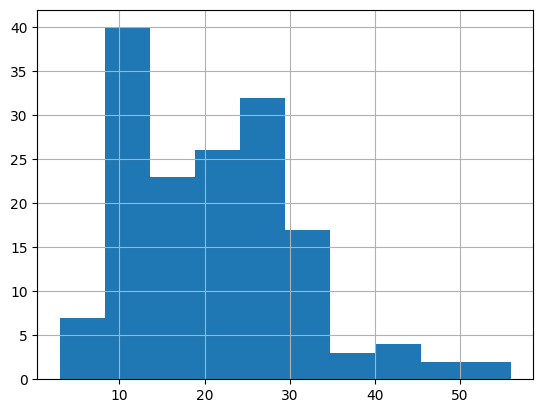

In [ ]:
###Yoga

df_new["Yoga"].hist()

<AxesSubplot:xlabel='Yoga', ylabel='Density'>

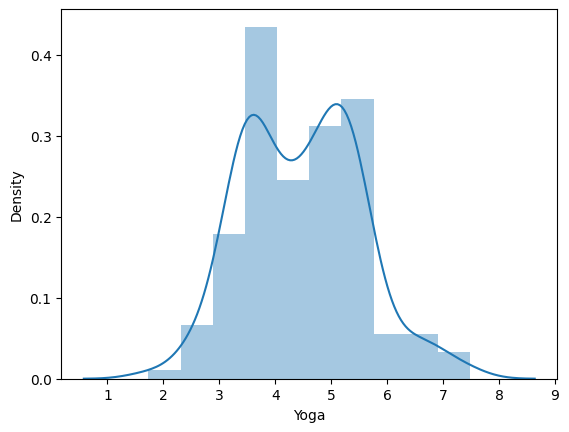

In [ ]:
#distribution plot
sns.distplot(np.sqrt(df_new["Yoga"]))

<AxesSubplot:xlabel='PAFS', ylabel='Density'>

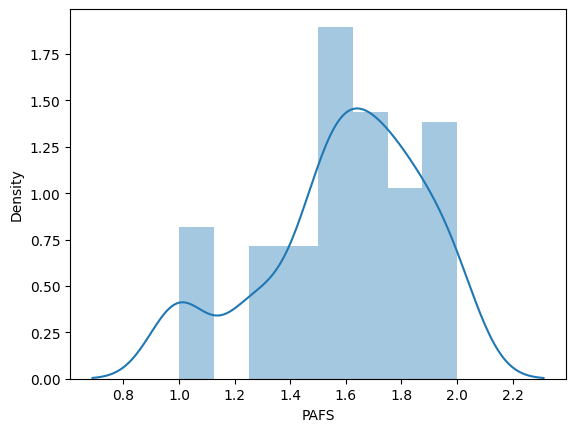

In [ ]:
#distrribution plot
sns.distplot(np.cbrt(df_new["PAFS"]))

In [ ]:
##Bivariate Analysis

## 1 Linear Correlation --> Pearson Corelation

df_clean.shape,df_new.shape

((156, 7), (156, 5))

In [ ]:
df_clean.columns

Index(['Team', 'Points', 'WL', 'Yoga', 'Laps', 'WI', 'PAFS'], dtype='object')

In [ ]:

df_new.columns

Index(['WL', 'Yoga', 'Laps', 'WI', 'PAFS'], dtype='object')

In [ ]:
df_new["Points"]=df_clean['Points']
df_new["Team"]=df_clean['Team']

In [ ]:
#corerelation matrix
df_new.corr()

WL      Yoga      Laps        WI      PAFS    Points
WL      1.000000  0.940899  0.989656  0.716546  0.001012  0.448556
Yoga    0.940899  1.000000  0.927862  0.617798  0.026512  0.343593
Laps    0.989656  0.927862  1.000000  0.776036  0.024935  0.479233
WI      0.716546  0.617798  0.776036  1.000000  0.129837  0.425148
PAFS    0.001012  0.026512  0.024935  0.129837  1.000000  0.048566
Points  0.448556  0.343593  0.479233  0.425148  0.048566  1.000000

Text(0.5, 1.0, 'Linear Correlation Mateix')

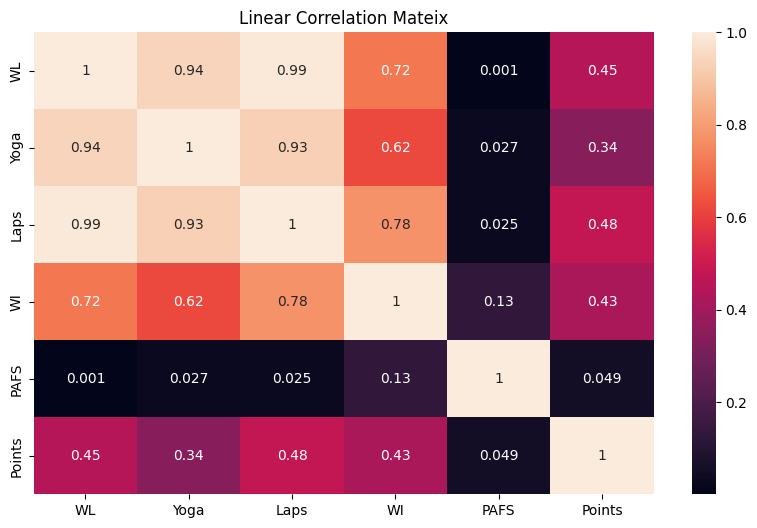

In [ ]:
plt.rcParams["figure.figsize"]=(10,6)

#heatmap of correlation matrix
sns.heatmap(df_new.corr(),annot=True)

plt.title("Linear Correlation Mateix")

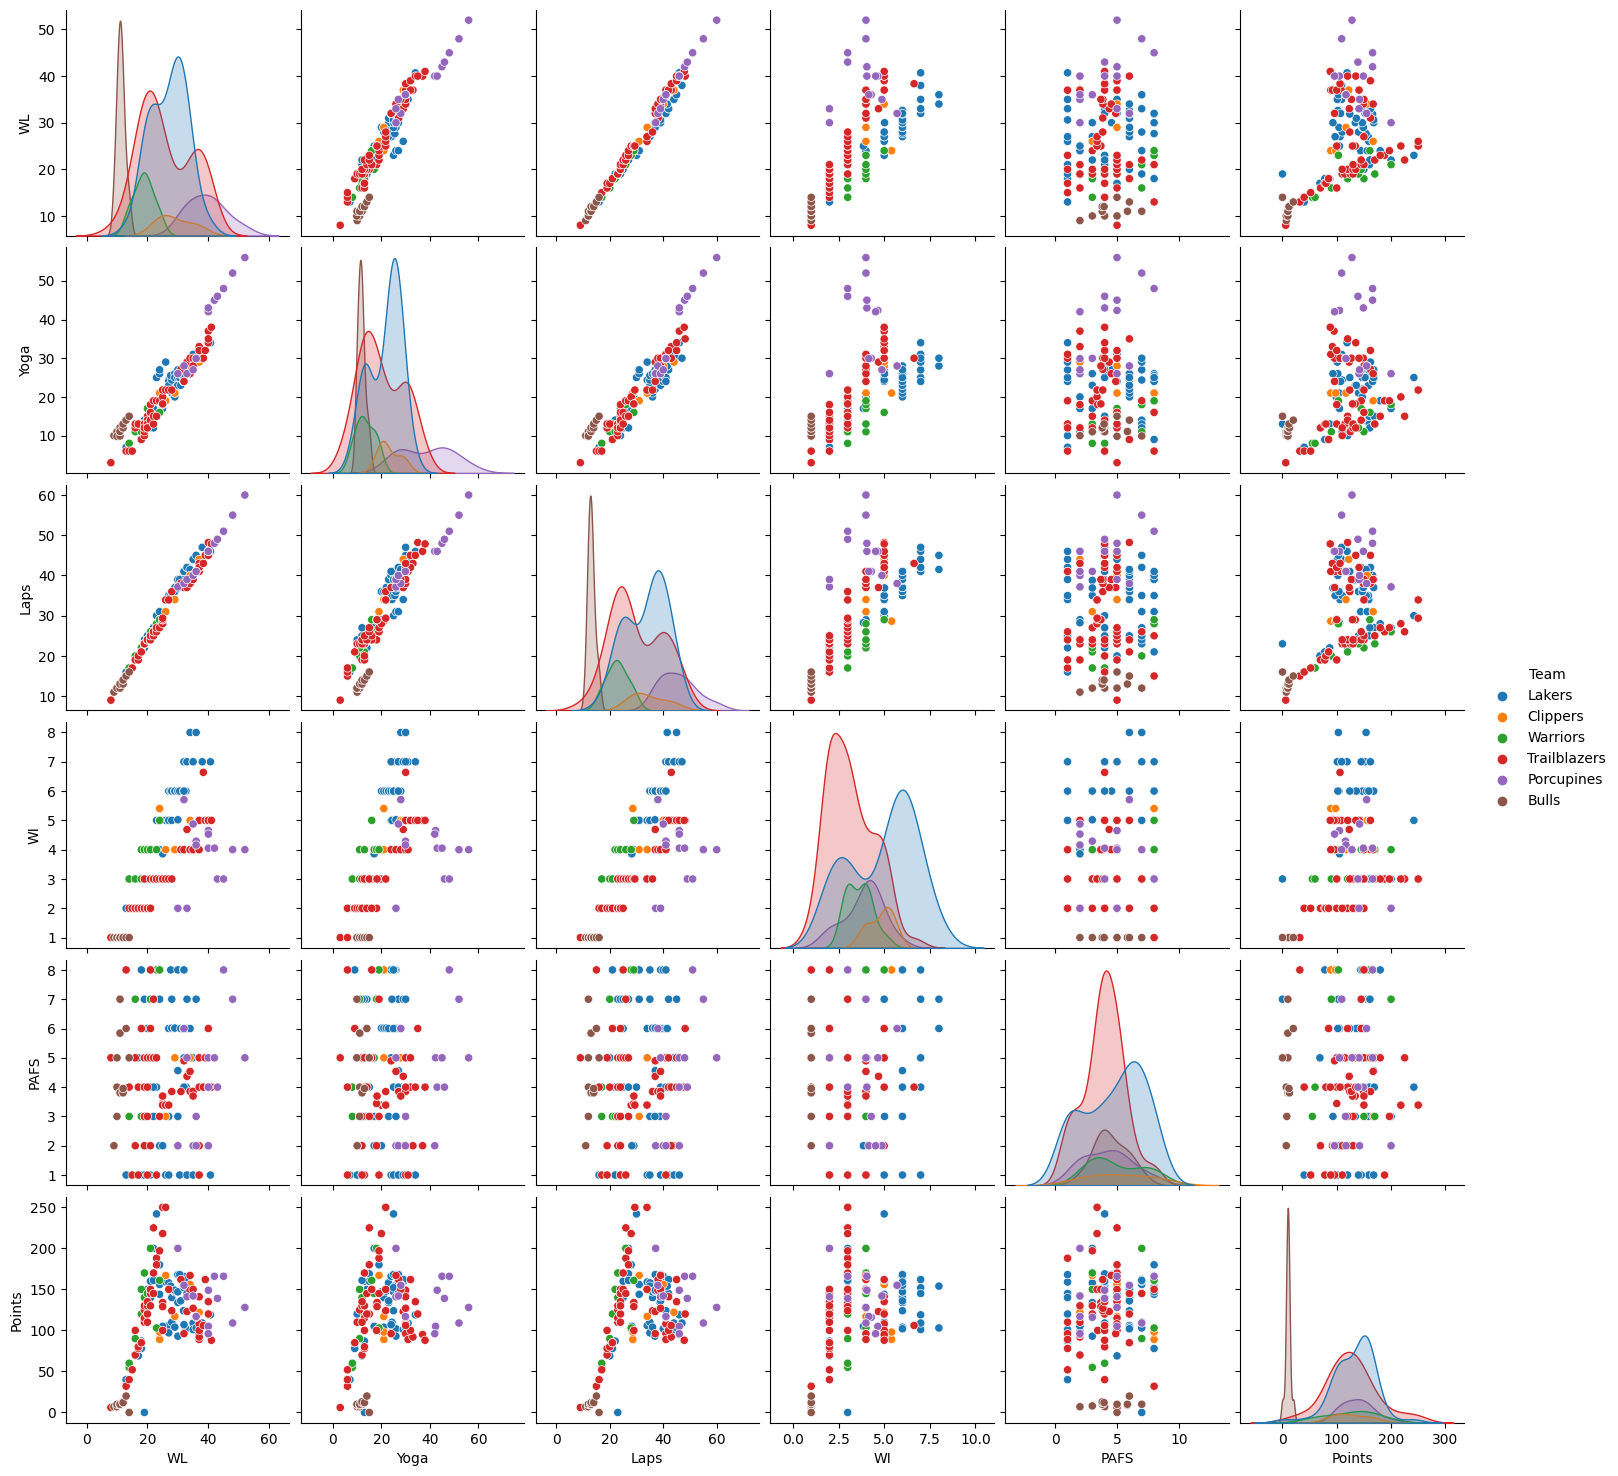

In [ ]:
#pairplot of the data
sns.pairplot(df_new,kind='scatter',hue='Team')

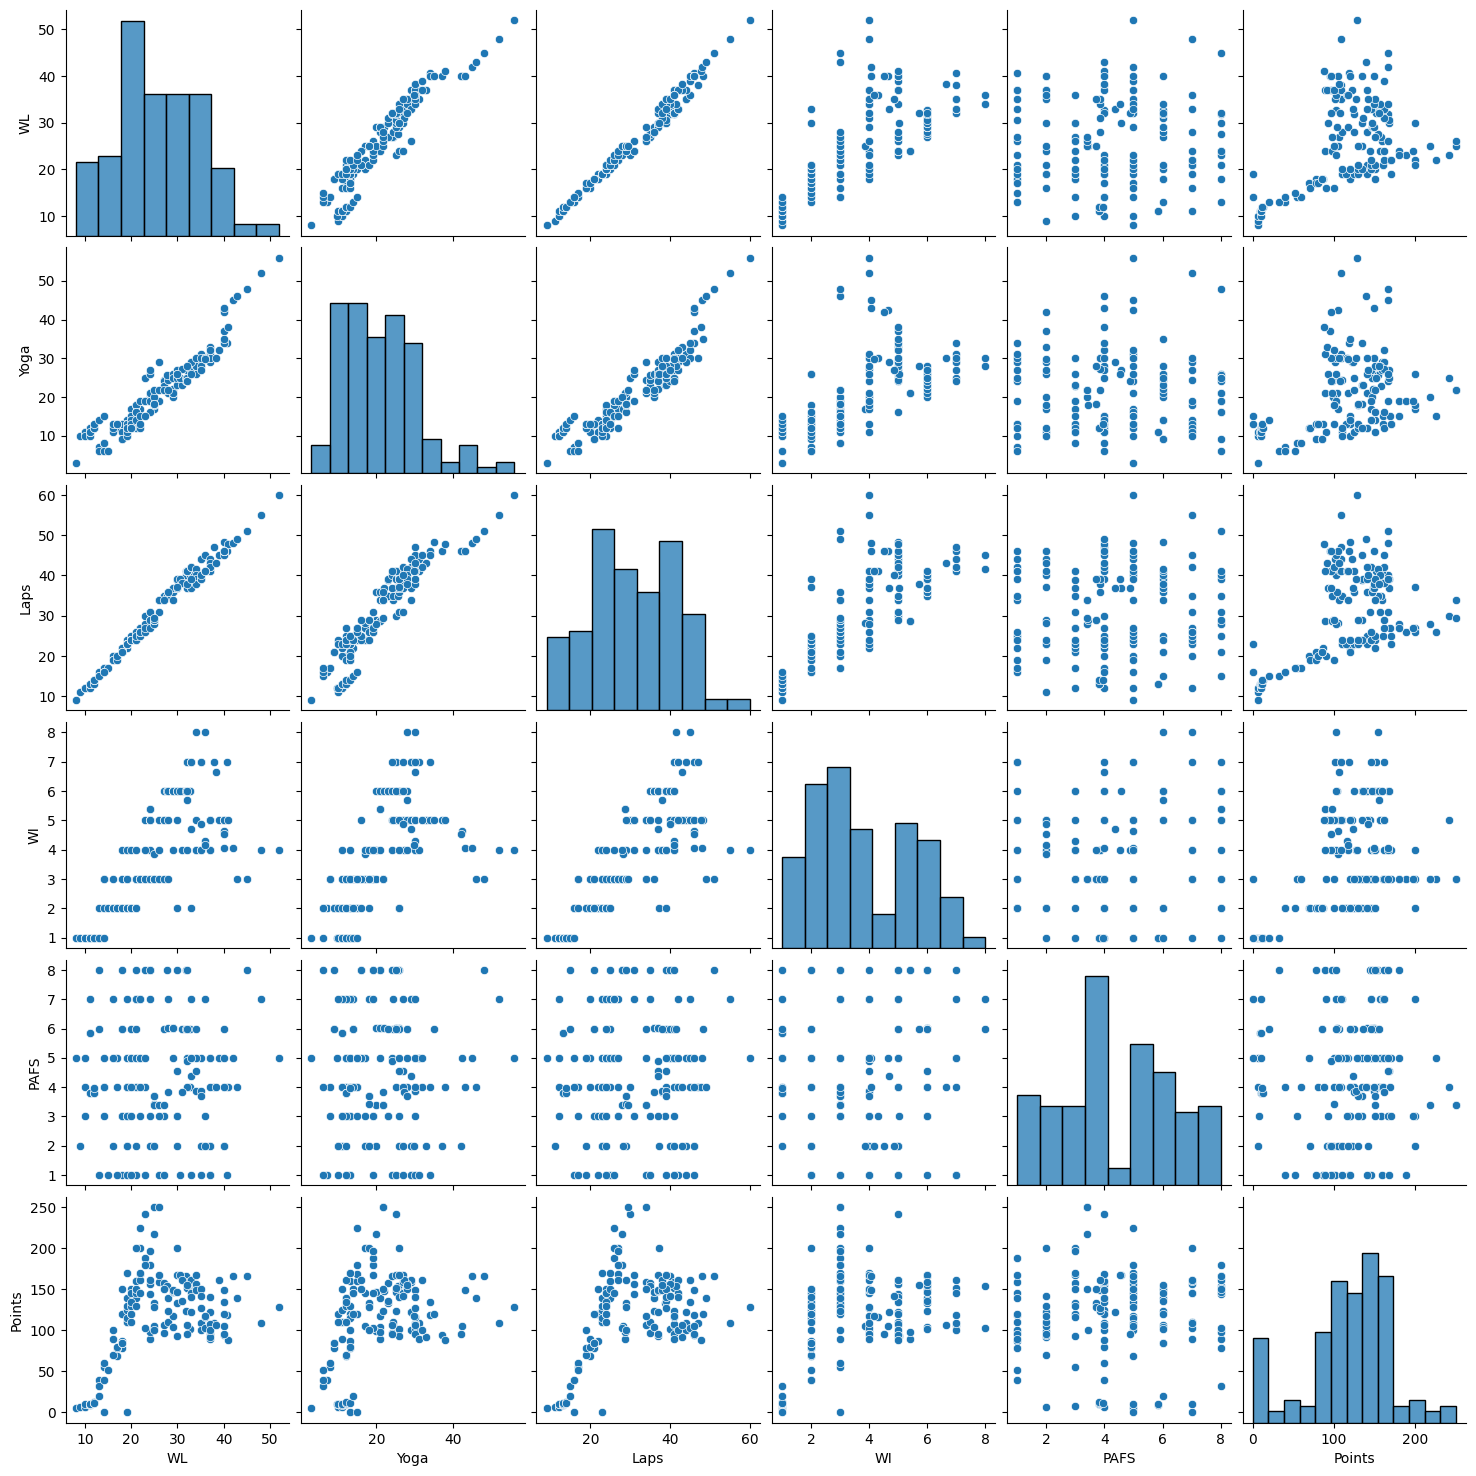

In [ ]:
#scatter pairplot
sns.pairplot(df_new,kind='scatter')

In [ ]:
#function for finding chatterejee correlation coefficient
def chatterjee_corr(df,x,y):
  N=df.shape[0]
  df_rank=df

  df_rank['rank']=df_rank[y].rank()
  #print(df_rank['rank'])

  df_rank['rank_x']=df_rank[x].rank()

  df_rank=df_rank.sort_values(by='rank_x')

  #1-3*(abs(sum(xri-1 - Xir))/n square-1

  #Diff function --> summation -> absolute

  chatt_corr=1- (3*df_rank['rank'].diff().abs().sum() )/ (pow(N,2)-1)

  return chatt_corr

In [ ]:
chatterjee_corr(df_new,'WL','Points')

0.4062872405999589

In [ ]:
chatterjee_corr(df_new,'WI','Points')

0.39198685021573865

In [ ]:
chatterjee_corr(df_new,'Laps','Points')

0.4229299363057325

In [ ]:
chatterjee_corr(df_new,'PAFS','Points')

0.0019930141771111742

In [ ]:
chatterjee_corr(df_new,'Yoga','Points')

0.2911444421614958

In [ ]:
# determining whether team essentially affects the points variable for the dataset



# Single Way ANOVA


In [ ]:
import random

nba_id=list(df_new.index.unique())

random.seed(13)



In [ ]:
nba_id

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158]

In [ ]:
sample_match_id=random.sample(nba_id,50)


In [ ]:

sample_df=df_new[df_new.index.isin(sample_match_id)].reset_index(drop=True)

In [ ]:
sample_df=sample_df[['Team','Points']]

groups=sample_df.groupby('Team').count().reset_index()

In [ ]:
groups

Team  Points
0         Bulls       5
1      Clippers       4
2        Lakers      14
3    Porcupines       3
4  Trailblazers      20
5      Warriors       4

In [ ]:
##Normality

import scipy.stats as stats

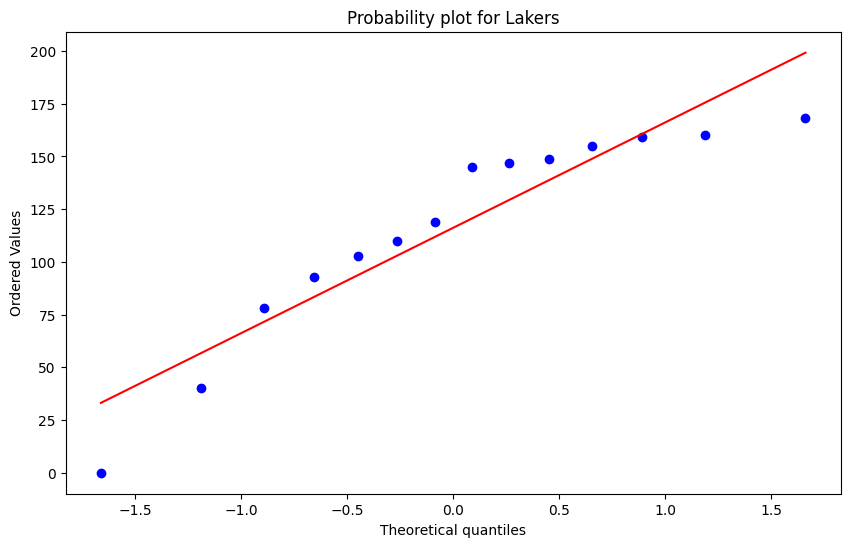

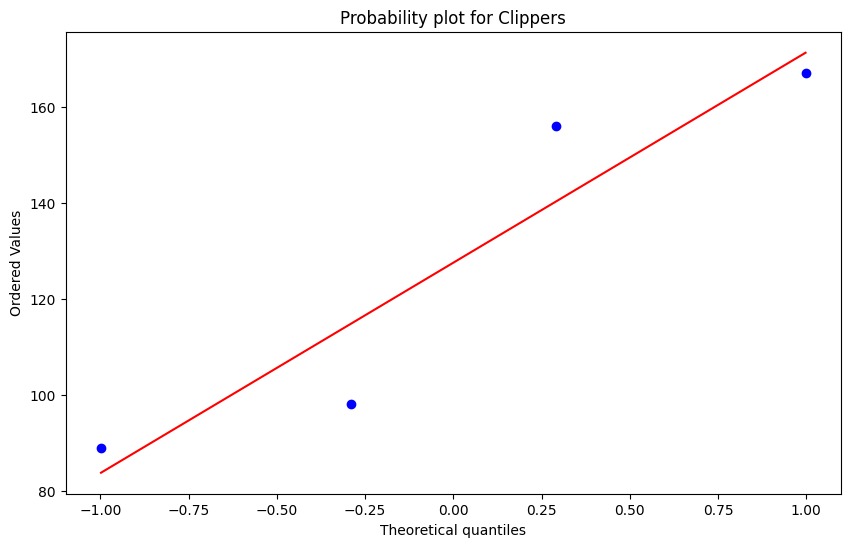

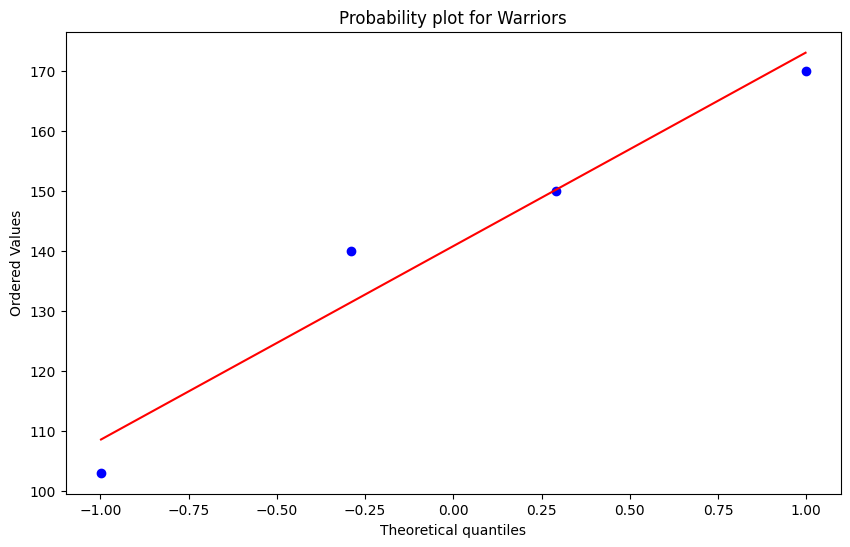

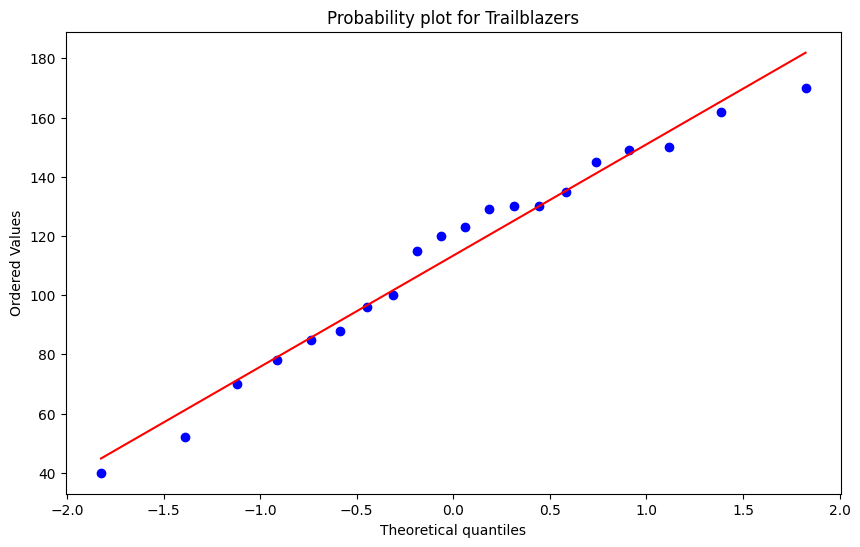

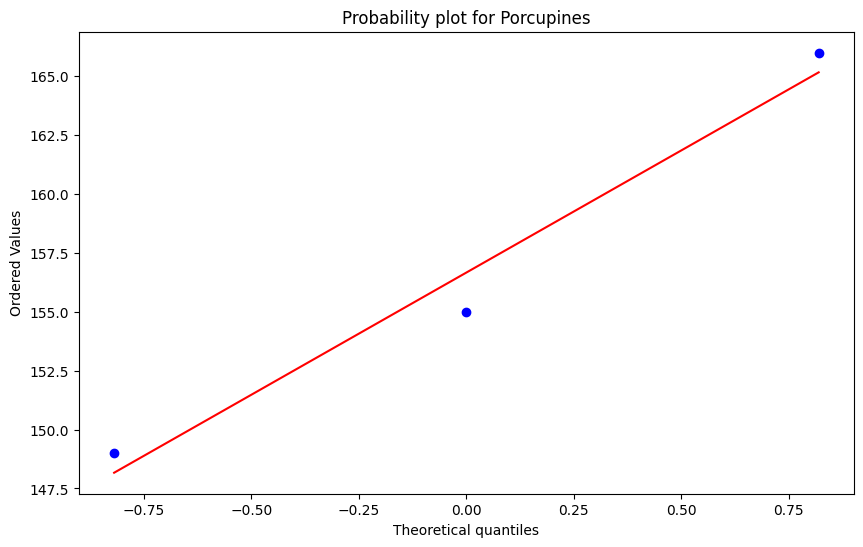

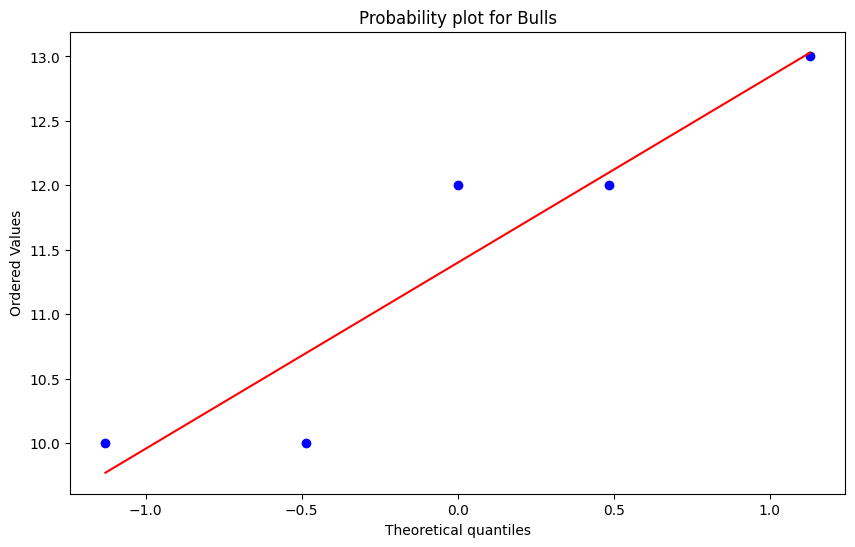

In [ ]:
unique_teams=sample_df['Team'].unique()
#quantile quantile plots
for i in unique_teams:
  stats.probplot(sample_df[sample_df['Team']==i]['Points'],dist='norm',plot=plt)
  plt.title('Probability plot for '+ i)
  plt.show()

In [ ]:
ratio=sample_df.groupby('Team').std().max()/sample_df.groupby('Team').std().min()
ratio

Points    37.164289
dtype: float64

In [ ]:
#implement anova from scratch

data=[['Between Groups','','','','','',''],['Within Groups','','','','','',''],['Total','','','','','','']]

anova_table=pd.DataFrame(data,columns=['Variation','SS','df','MS','F value','P value','F critical'])

anova_table.set_index('Variation',inplace=True)

In [ ]:
x_bar=sample_df['Points'].mean()

#porcupines - 2 overall 10 8
SSTR=sample_df.groupby('Team').count()*(sample_df.groupby('Team').mean()-x_bar)**2

In [ ]:
anova_table['SS']['Between Groups']=SSTR['Points'].sum()

In [ ]:
anova_table

SS df MS F value P value F critical
Variation                                                    
Between Groups  60902.139048                                 
Within Groups                                                
Total

In [ ]:
SSE=(sample_df.groupby('Team').count()-1)*sample_df.groupby('Team').std()**2

In [ ]:
SSE

Points
Team                      
Bulls             7.200000
Clippers       4725.000000
Lakers        32319.714286
Porcupines      148.666667
Trailblazers  24798.550000
Warriors       2366.750000

In [ ]:
anova_table['SS']['Within Groups']=SSE['Points'].sum()

In [ ]:
anova_table

SS df MS F value P value F critical
Variation                                                    
Between Groups  60902.139048                                 
Within Groups   64365.880952                                 
Total

In [ ]:
total=SSE['Points'].sum()+SSTR['Points'].sum()

In [ ]:
anova_table['SS']['Total']=total

In [ ]:
anova_table

SS df MS F value P value F critical
Variation                                                    
Between Groups  60902.139048                                 
Within Groups   64365.880952                                 
Total              125268.02

In [ ]:
anova_table['df']['Between Groups']=sample_df['Team'].nunique()-1
anova_table['df']['Within Groups']=sample_df.shape[0]-sample_df['Team'].nunique()
anova_table['df']['Total']=sample_df.shape[0]-1

In [ ]:
anova_table

SS  df MS F value P value F critical
Variation                                                     
Between Groups  60902.139048   5                              
Within Groups   64365.880952  44                              
Total              125268.02  49

In [ ]:
anova_table['MS']=anova_table['SS']/anova_table['df']
anova_table['F value']['Between Groups']=anova_table['MS']['Between Groups']/anova_table['MS']['Within Groups']

anova_table['P value']['Between Groups']=1-stats.f.cdf(anova_table['F value']['Between Groups'],
                                                        anova_table['df']['Between Groups'],
                                                        anova_table['df']['Within Groups'])

anova_table

SS  df           MS   F value   P value F critical
Variation                                                                   
Between Groups  60902.139048   5  12180.42781  8.326443  0.000013           
Within Groups   64365.880952  44  1462.860931                               
Total              125268.02  49  2556.490204

In [ ]:
alpha=0.05

hypothesis_type="two tailed"

if hypothesis_type=="two tailed":
  alpha=alpha/2


anova_table['F critical']['Between Groups']=stats.f.ppf(1-alpha,
                                                        anova_table['df']['Between Groups'],
                                                        anova_table['df']['Within Groups'])

anova_table

SS  df           MS   F value   P value F critical
Variation                                                                   
Between Groups  60902.139048   5  12180.42781  8.326443  0.000013   2.871184
Within Groups   64365.880952  44  1462.860931                               
Total              125268.02  49  2556.490204

In [ ]:
# Pvalue approach

print("Approach for P value ")

conclusion="Failed to reject null hypothesis"

if anova_table['P value']['Between Groups']<=alpha:
  conclusion="Null hypothesis is rejected"

print("F value for the table is ", anova_table['F value']['Between Groups'],"and p value is ",anova_table['P value']['Between Groups'] )

print(conclusion)

Approach for P value 
F value for the table is  8.326442762673361 and p value is  1.3292810565279645e-05
Null hypothesis is rejected


In [ ]:
# Fcritical approach

print("Approach for F critical ")

conclusion="Failed to reject null hypothesis"

if anova_table['F value']['Between Groups']>anova_table['F critical']['Between Groups']:
  conclusion="Null hypothesis is rejected"

print("F value for the table is ", anova_table['F value']['Between Groups'],"and F critical value is ",anova_table['F critical']['Between Groups'] )

print(conclusion)

Approach for F critical 
F value for the table is  8.326442762673361 and F critical value is  2.871183837102218
Null hypothesis is rejected


### Data Preparation

In [ ]:
## Processing data for modelling
#one hot encoding
one_hot_df=pd.get_dummies(df_clean,columns=['Team'],drop_first=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


In [ ]:
X=one_hot_df[['WL', 'Yoga', 'Laps', 'WI', 'PAFS', 'Team_Clippers',
       'Team_Lakers', 'Team_Porcupines', 'Team_Trailblazers', 'Team_Warriors']]

y=one_hot_df['Points']

#train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

print("X train dimension is ",X_train.shape)
print("y train dimension is ",y_train.shape)
print("X test dimension is ",X_test.shape)
print("y test dimension is ",y_test.shape)

X train dimension is  (124, 10)
y train dimension is  (124,)
X test dimension is  (32, 10)
y test dimension is  (32,)


In [ ]:
X_train.head(1)

WL  Yoga  Laps  WI  PAFS  Team_Clippers  Team_Lakers  Team_Porcupines  \
56  24.0  21.0   NaN NaN   8.0              1            0                0   

    Team_Trailblazers  Team_Warriors  
56                  0              0

In [ ]:
#Start Imputing here

imputer=LGBMImputer(n_iter=15,verbose=True)

X_train_full=imputer.fit_transform(X_train)

X_train_clean=pd.DataFrame(X_train_full,columns=X_train.columns)

X_train_clean.head()

  0%|          | 0/5 [00:00<?, ?it/s]

WL  Yoga       Laps        WI  PAFS  Team_Clippers  Team_Lakers  \
56  24.0  21.0  28.693476  3.276111   8.0              1            0   
34  38.0  30.0  47.000000  7.000000   4.0              0            1   
81  18.0   9.0  21.000000  2.000000   6.0              0            0   
35  13.0   7.0  16.000000  2.000000   1.0              0            1   
66  19.0  12.0  23.000000  3.000000   4.0              0            0   

    Team_Porcupines  Team_Trailblazers  Team_Warriors  
56                0                  0              0  
34                0                  0              0  
81                0                  1              0  
35                0                  0              0  
66                0                  0              1

### Modelling


In [ ]:
X_test

WL  Yoga  Laps   WI  PAFS  Team_Clippers  Team_Lakers  Team_Porcupines  \
130  33.0  26.0  39.0  2.0   5.0              0            0                1   
123  39.0  32.0  45.0  5.0   5.0              0            0                0   
3    26.0  29.0  34.0  5.0   1.0              0            1                0   
152  11.0  12.0  13.0  1.0   NaN              0            0                0   
133  36.0   NaN  41.0  NaN   2.0              0            0                1   
112  34.0  26.0  39.0  4.0   NaN              0            0                0   
27   33.0  29.0  42.0  7.0   7.0              0            1                0   
115  35.0  28.0  39.0  4.0   NaN              0            0                0   
40   19.0  13.0  23.0  3.0   7.0              0            1                0   
65   18.0  11.0  22.0  4.0   3.0              0            0                0   
14   29.0  22.0  37.0  6.0   NaN              0            1                0   
153  11.0   NaN  13.0  1.0   NaN              0            0                0   
74   14.0   6.0  16.0  2.0   4.0              0            0                0   
62   14.0   8.0  17.0  3.0   4.0              0            0                0   
45   21.0  13.0  25.0  3.0   7.0              0            1                0   
140  48.0  52.0  55.0  4.0   7.0              0            0                1   
44   21.0  14.0  24.0  3.0   7.0              0            1                0   
21    NaN  25.0  39.0  6.0   1.0              0            1                0   
43   20.0  14.0  25.0  2.0   6.0              0            1                0   
105  25.0   NaN   NaN  3.0   NaN              0            0                0   
117   NaN  31.0  41.0  4.0   1.0              0            0                0   
111  33.0  29.0  37.0  NaN   NaN              0            0                0   
147  10.0  11.0  12.0  1.0   4.0              0            0                0   
135  40.0   NaN  46.0  NaN   2.0              0            0                1   
136  40.0  43.0  46.0  NaN   4.0              0            0                1   
50   22.0  17.0  27.0  3.0   3.0              0            1                0   
60   37.0  29.0  44.0  5.0   2.0              1            0                0   
73   13.0   6.0  15.0  1.0   8.0              0            0                0   
146  10.0  11.0  12.0  1.0   3.0              0            0                0   
17   30.0  25.0  39.0  6.0   8.0              0            1                0   
120  37.0  33.0  43.0  5.0   2.0              0            0                0   
87   20.0  14.0  24.0  2.0   4.0              0            0                0   

     Team_Trailblazers  Team_Warriors  
130                  0              0  
123                  1              0  
3                    0              0  
152                  0              0  
133                  0              0  
112                  1              0  
27                   0              0  
115                  1              0  
40                   0              0  
65                   0              1  
14                   0              0  
153                  0              0  
74                   1              0  
62                   0              1  
45                   0              0  
140                  0              0  
44                   0              0  
21                   0              0  
43                   0              0  
105                  1              0  
117                  1              0  
111                  1              0  
147                  0              0  
135                  0              0  
136                  0              0  
50                   0              0  
60                   0              0  
73                   1              0  
146                  0              0  
17                   0              0  
120                  1              0  
87                   1              0

Linear Regression

In [ ]:
import mlfoundry
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


def truefoundry_model_tracker(project_name,run_name,model_object,model_name,framework,description,test,pred):
  #We are tracking metrics using this function. We will not be tracking plots and dataset through this function
  #That can be done separately
  client = mlfoundry.get_client()
  run = client.create_run(project_name=project_name, run_name=run_name)
  try:
    run.log_params(model_object.params.to_dict())
  except:
    run.log_params(model_object.get_params())
  run.log_model(name=model_name,model=model_object,framework=framework,description=description)
  run.log_metrics({
    "mean_absolute_error": mean_absolute_error(test,pred),
    "mean_square_error": mean_squared_error(test,pred),
    "root_mean_square_error": np.sqrt(mean_squared_error(test,pred)),
    "r2_score": r2_score(test,pred)
  })


In [ ]:
#requires less time

import statsmodels.api as sm

result=sm.OLS(y_train,X_train_clean).fit()

#run.log_params(result.params.to_dict())

In [ ]:

print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Points   R-squared (uncentered):                   0.926
Model:                            OLS   Adj. R-squared (uncentered):              0.919
Method:                 Least Squares   F-statistic:                              141.8
Date:                Sat, 22 Oct 2022   Prob (F-statistic):                    1.86e-59
Time:                        09:10:59   Log-Likelihood:                         -618.46
No. Observations:                 124   AIC:                                      1257.
Df Residuals:                     114   BIC:                                      1285.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [ ]:
X_const=sm.add_constant(X_train_clean)

result=sm.OLS(y_train,X_const).fit()

#run.log_model(name='Statsmodellr',model=result,framework='statsmodels',description='Linear Regression using Statsmodels.api')


print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Points   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     10.99
Date:                Sat, 22 Oct 2022   Prob (F-statistic):           6.94e-13
Time:                        09:11:01   Log-Likelihood:                -618.20
No. Observations:                 124   AIC:                             1258.
Df Residuals:                     113   BIC:                             1289.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -11.1662     16.12

In [ ]:
imputer.transform(X_test)

  0%|          | 0/5 [00:00<?, ?it/s]

WL       Yoga       Laps        WI      PAFS  Team_Clippers  \
130  33.000000  26.000000  39.000000  2.000000  5.000000              0   
123  39.000000  32.000000  45.000000  5.000000  5.000000              0   
3    26.000000  29.000000  34.000000  5.000000  1.000000              0   
152  11.000000  12.000000  13.000000  1.000000  4.074220              0   
133  36.000000  30.723582  41.000000  4.428268  2.000000              0   
112  34.000000  26.000000  39.000000  4.000000  4.183082              0   
27   33.000000  29.000000  42.000000  7.000000  7.000000              0   
115  35.000000  28.000000  39.000000  4.000000  4.183082              0   
40   19.000000  13.000000  23.000000  3.000000  7.000000              0   
65   18.000000  11.000000  22.000000  4.000000  3.000000              0   
14   29.000000  22.000000  37.000000  6.000000  4.427737              0   
153  11.000000  12.880052  13.000000  1.000000  5.063766              0   
74   14.000000   6.000000  16.000000  2.000000  4.000000              0   
62   14.000000   8.000000  17.000000  3.000000  4.000000              0   
45   21.000000  13.000000  25.000000  3.000000  7.000000              0   
140  48.000000  52.000000  55.000000  4.000000  7.000000              0   
44   21.000000  14.000000  24.000000  3.000000  7.000000              0   
21   28.725631  25.000000  39.000000  6.000000  1.000000              0   
43   20.000000  14.000000  25.000000  2.000000  6.000000              0   
105  25.000000  22.680031  28.693476  3.000000  4.225506              0   
117  35.840806  31.000000  41.000000  4.000000  1.000000              0   
111  33.000000  29.000000  37.000000  4.354866  4.183082              0   
147  10.000000  11.000000  12.000000  1.000000  4.000000              0   
135  40.000000  31.624189  46.000000  4.428268  2.000000              0   
136  40.000000  43.000000  46.000000  4.450743  4.000000              0   
50   22.000000  17.000000  27.000000  3.000000  3.000000              0   
60   37.000000  29.000000  44.000000  5.000000  2.000000              1   
73   13.000000   6.000000  15.000000  1.000000  8.000000              0   
146  10.000000  11.000000  12.000000  1.000000  3.000000              0   
17   30.000000  25.000000  39.000000  6.000000  8.000000              0   
120  37.000000  33.000000  43.000000  5.000000  2.000000              0   
87   20.000000  14.000000  24.000000  2.000000  4.000000              0   

     Team_Lakers  Team_Porcupines  Team_Trailblazers  Team_Warriors  
130            0                1                  0              0  
123            0                0                  1              0  
3              1                0                  0              0  
152            0                0                  0              0  
133            0                1                  0              0  
112            0                0                  1              0  
27             1                0                  0              0  
115            0                0                  1              0  
40             1                0                  0              0  
65             0                0                  0              1  
14             1                0                  0              0  
153            0                0                  0              0  
74             0                0                  1              0  
62             0                0                  0              1  
45             1                0                  0              0  
140            0                1                  0              0  
44             1                0                  0              0  
21             1                0                  0              0  
43             1                0                  0              0  
105            0                0                  1              0  
117            0                0                  1              

In [ ]:
test=pd.DataFrame(imputer.transform(X_test))

  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
res=result.predict(sm.add_constant(test[['WL', 'Yoga', 'Laps', 'WI', 'PAFS', 'Team_Clippers', 'Team_Lakers',
       'Team_Porcupines', 'Team_Trailblazers', 'Team_Warriors']]))

In [ ]:
#RMSE, MAE, MSE

from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
print("MAE of the model is",mean_absolute_error(y_test,res))

MAE of the model is 32.845231313669586


In [ ]:
print("MSE of the model is",mean_squared_error(y_test,res))

MSE of the model is 2167.8298296756616


In [ ]:
print("RMSE of the model is",np.sqrt(mean_squared_error(y_test,res)))

RMSE of the model is 46.55995951110419


In [ ]:

print("R2 score for test is",r2_score(y_test,res))

R2 score for test is 0.4382506140825735


In [ ]:
#truefoundry_model_tracker(project_name,run_name,model_object,model_name,framework,description,test,pred)
truefoundry_model_tracker("SplinesProject","SplinesRegressionProject",result,"LinearRegression","statsmodels","Doing the first run for LR",y_test,res)


In [ ]:
#Line is not a good fit and so we are going for polynomials
# We will create a line as well as a polynomial for comparison

#numpy.polyfit
# numpy.linespace -> create space and plot values -> Space creation using args
# numpy.poly1d -> To create the polynomial equation

In [ ]:
def create_polynomial_plot(feature,label):
  #convert to 1d
  x_coordinates=feature
  y_coordinates=np.squeeze(label)

  linear_poly=np.poly1d(np.polyfit(x_coordinates,y_coordinates,1))
  quadratic_poly=np.poly1d(np.polyfit(x_coordinates,y_coordinates,2))
  cubic_poly=np.poly1d(np.polyfit(x_coordinates,y_coordinates,3))


  values=np.linspace(x_coordinates.min(),x_coordinates.max(),len(x_coordinates))
  plt.scatter(x_coordinates,y_coordinates,color='blue')
  plt.plot(values,linear_poly(values),color='cyan',label='Linear Model')
  plt.plot(values,quadratic_poly(values),color='red',label='Quadratic Model')
  plt.plot(values,cubic_poly(values),color='yellow',label='Cubic Model')

  plt.xlabel("%s from data" %(feature.name))
  plt.ylabel("Points")

  plt.rcParams["figure.figsize"]=(12,6)

  plt.legend()
  plt.title("Linear vs Quadratic")
  #mlf_run.log_plots({"polynomial_plot": plt}, step=1)
  plt.show()





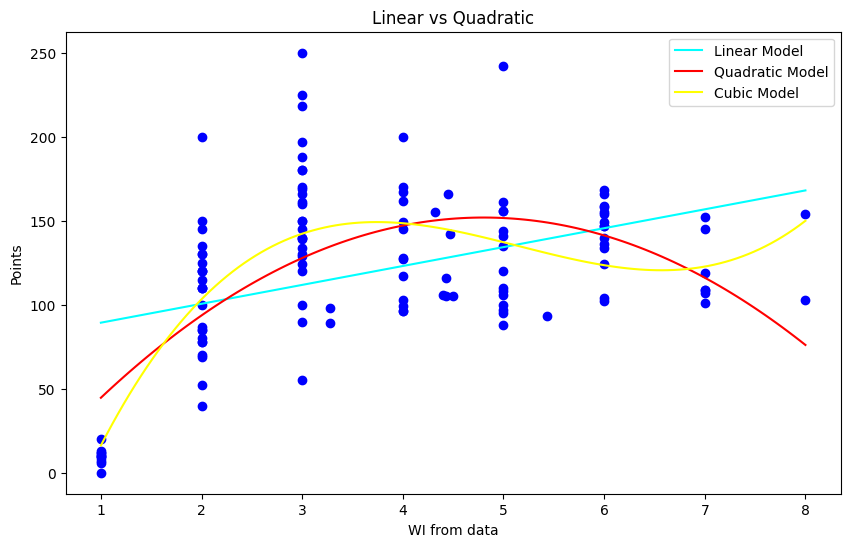

In [ ]:
create_polynomial_plot(X_train_clean.WI,y_train)

In [ ]:
########
#1 Create a set of polynomial features

#2 Apply a linear regression
########

#mlf_run = client.create_run(project_name="Regression-Splines-Part-2", run_name="poly-fit-sklearn")

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly=PolynomialFeatures(degree=4)
X_poly=poly.fit_transform(X_train_clean)

poly.fit(X_poly,y_train)

PolynomialFeatures(degree=4)

In [ ]:
from sklearn import linear_model

lm=linear_model.LinearRegression()

lm.fit(X_poly,y_train)

LinearRegression()

In [ ]:
#Doing predictions on test data

predictions=lm.predict(poly.fit_transform(test))

print("R2 score for test is",r2_score(y_test,predictions))

R2 score for test is -382.50316753241464


In [ ]:
print("RMSE of the model is",np.sqrt(mean_squared_error(y_test,predictions)))

RMSE of the model is 1216.538250142281


In [ ]:
#You can also use below function for polynomial regression
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression
# pp=Pipeline([
#     ('poly',PolynomialFeatures(degree=2)),
#     ('model',LinearRegression())
# ])

# pp.fit(X_train_clean,y_train)
# y_pred=pp.predict(test)

Starting with PieceWise Regression


In [ ]:
import piecewise_regression

In [ ]:
# 2 dimensions
# 1 dependent and 1 independent
# X_train_clean (no missing values) --> NA --->

In [ ]:
X_train_clean.WL, y_train

(56    24.000000
 34    38.000000
 81    18.000000
 35    13.000000
 66    19.000000
         ...    
 70    23.000000
 84    19.000000
 63    16.000000
 8     27.435544
 53    25.000000
 Name: WL, Length: 124, dtype: float64,
 56     98
 34    109
 81     85
 35     40
 66    140
      ... 
 70    103
 84    125
 63     90
 8     154
 53    105
 Name: Points, Length: 124, dtype: int64)

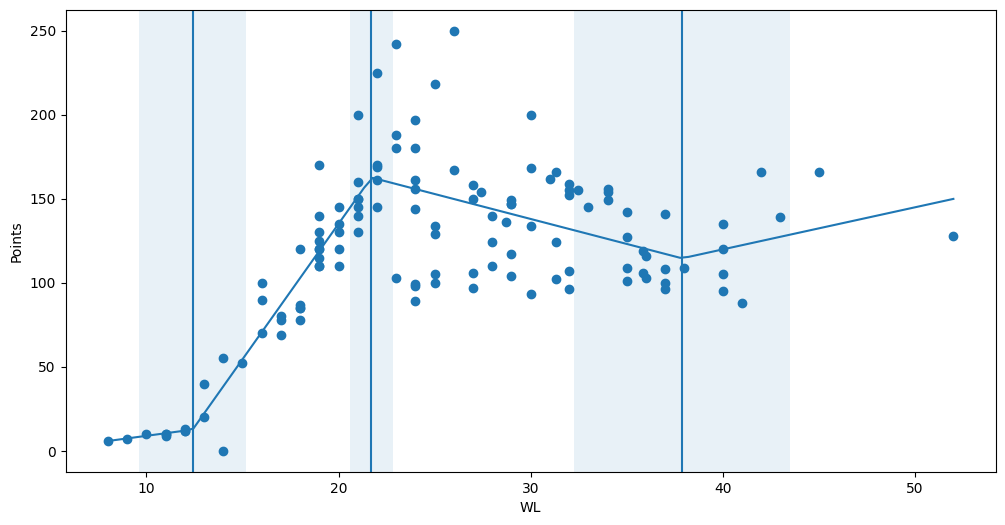

In [ ]:
pw_fit=piecewise_regression.Fit(X_train_clean.WL.ravel(),y_train.ravel(),n_breakpoints=3)
pw_fit.plot()
plt.xlabel("WL")
plt.ylabel("Points")
plt.show()

In [ ]:
print(pw_fit.summary())


                    Breakpoint Regression Results                     
No. Observations                      124
No. Model Parameters                    8
Degrees of Freedom                    116
Res. Sum of Squares               95822.5
Total Sum of Squares          3.06337e+05
R Squared                        0.687199
Adjusted R Squared               0.665439
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const               -6.55556         77.2    -0.084873         0.933      -159.54       146.43
alpha1               1.54167         7.19      0.21456          0.83       -12.69       15.773
beta1                14.5909         7.47       1.9523             -     -0.21197       29.394
beta2               -19.1054         2.19      -8.7287             -      -23.441       -14.77
beta3            

In [ ]:
# non zero difference in slopes (slope params) when there are segments

In [ ]:
overall_model=piecewise_regression.ModelSelection(X_train_clean.WL.ravel(),y_train.ravel(),max_breakpoints=5)

Running fit with n_breakpoint = 0 . . 
Running fit with n_breakpoint = 1 . . 
Running fit with n_breakpoint = 2 . . 
Running fit with n_breakpoint = 3 . . 
Running fit with n_breakpoint = 4 . . 
Running fit with n_breakpoint = 5 . . 

                 Breakpoint Model Comparision Results                 
n_breakpoints            BIC    converged          RSS 
----------------------------------------------------------------------------------------------------
0                     952.68         True   2.4905e+05 
1                     855.04         True   1.0485e+05 
2                      858.9         True   1.0007e+05 
3                     863.16         True   9.5823e+04 
4                     871.72         True   9.4993e+04 
5                     878.08         True   9.2514e+04 

Min BIC (Bayesian Information Criterion) suggests best model


Plotting fit for the model with 1 breakpoints


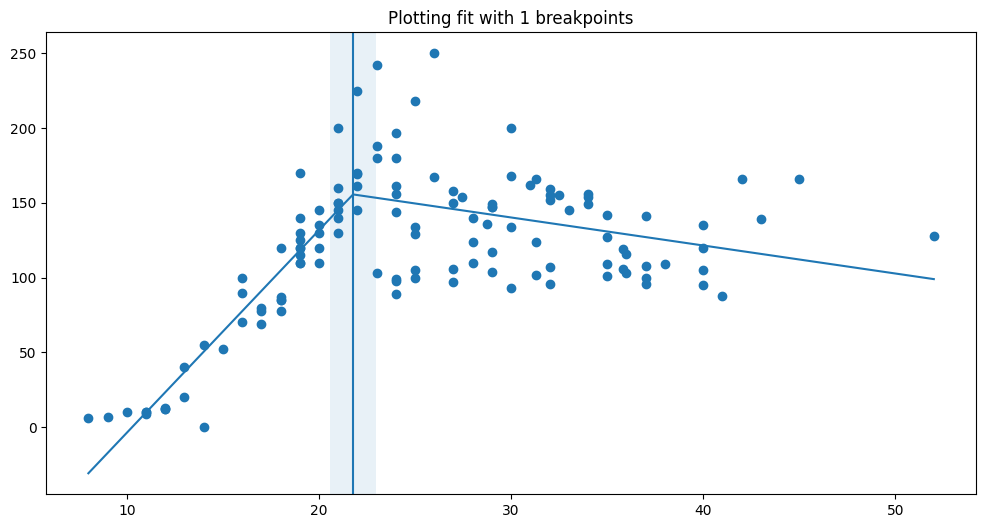

Plotting fit for the model with 2 breakpoints


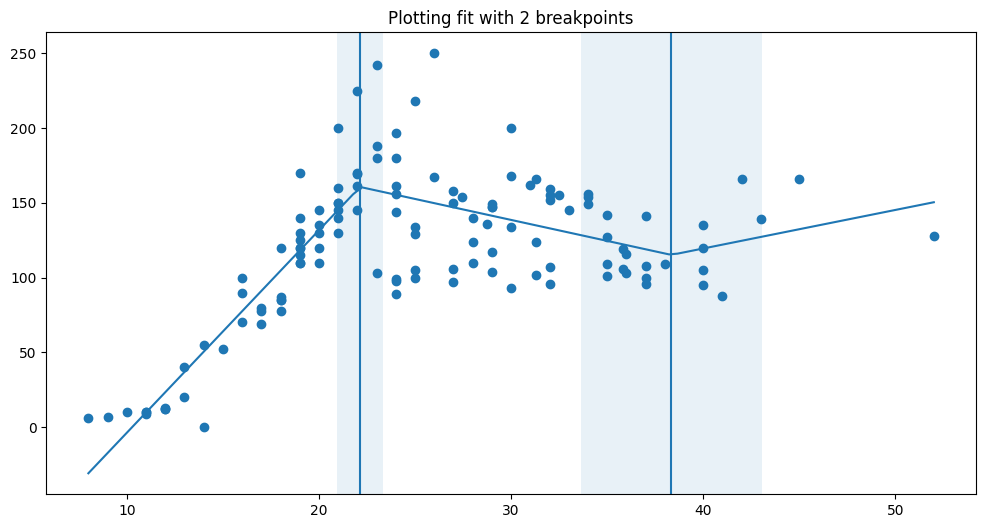

Plotting fit for the model with 3 breakpoints


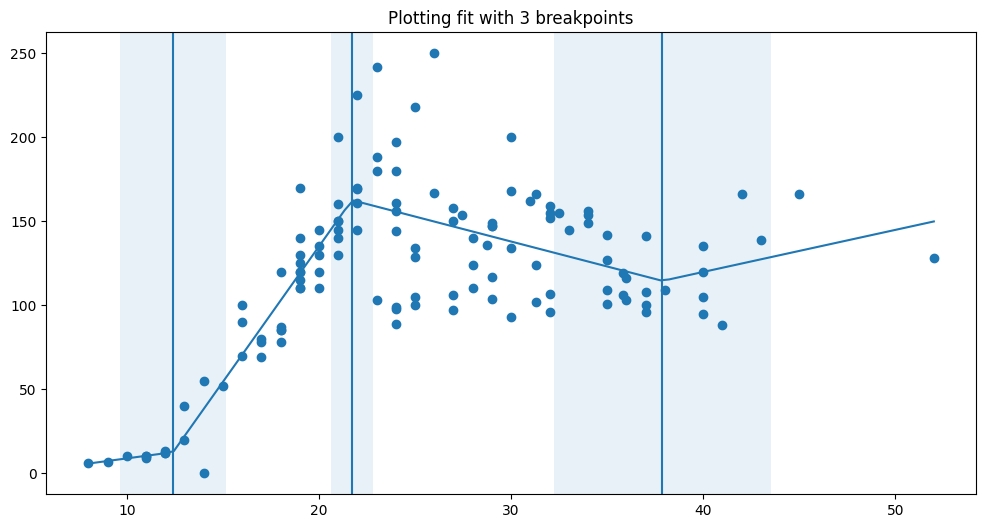

Plotting fit for the model with 4 breakpoints


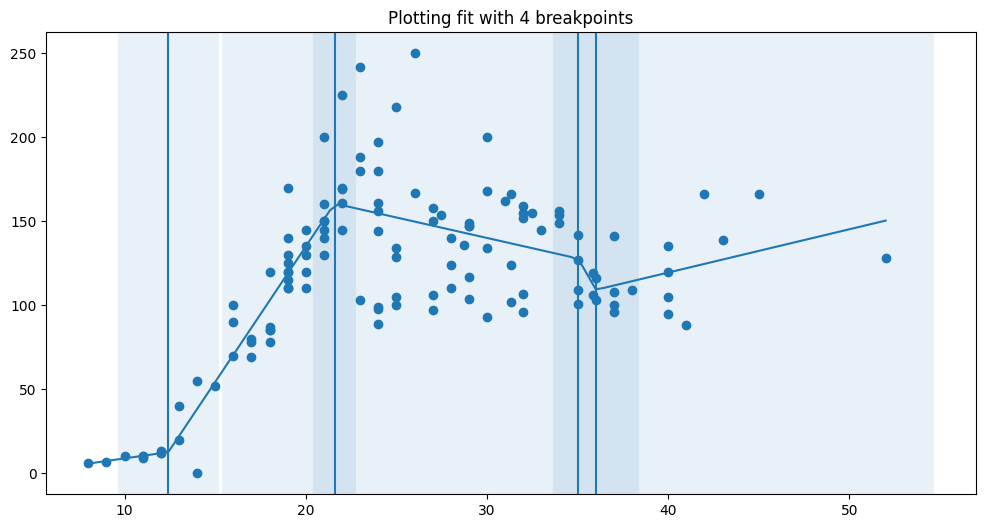

Plotting fit for the model with 5 breakpoints


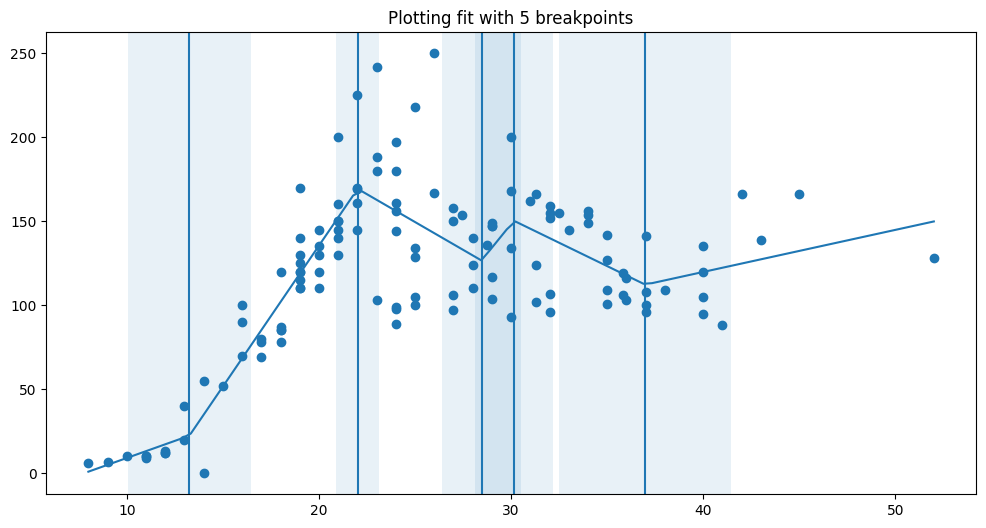

In [ ]:
for model in overall_model.models:
  print("Plotting fit for the model with {} breakpoints".format(model.n_breakpoints))
  model.plot()
  plt.title("Plotting fit with {} breakpoints".format(model.n_breakpoints))
  plt.show()

In [ ]:
pw_fit=piecewise_regression.Fit(X_train_clean.WL.ravel(),y_train.ravel(),n_breakpoints=1)


In [ ]:
pw_fit.get_results()

{'davies': 0.0,
 'estimates': {'const': {'estimate': -139.13426756868705,
   'se': 20.241439602642323,
   'confidence_interval': (-179.21090927999796, -99.05762585737612),
   't_stat': -6.87373380056053,
   'p_t': 2.995697176450859e-10},
  'beta1': {'estimate': -15.413870517296882,
   'se': 1.2910994259836532,
   'confidence_interval': (-17.970157526748103, -12.85758350784566),
   't_stat': -11.93856197833368,
   'p_t': '-'},
  'breakpoint1': {'estimate': 21.770069540284407,
   'se': 0.6039725568487563,
   'confidence_interval': (20.574245911162087, 22.965893169406726),
   't_stat': '-',
   'p_t': '-'},
  'alpha1': {'estimate': 13.540383818859572,
   'se': 1.1778080212495807,
   'confidence_interval': (11.20840590627248, 15.872361731446665),
   't_stat': 11.496257093319905,
   'p_t': 4.450939572307854e-21},
  'alpha2': {'estimate': -1.8734866984373095,
   'se': 0.5288723786089273,
   'confidence_interval': (-2.9206172012377083, -0.8263561956369105),
   't_stat': -3.542417366104597,
   

In [ ]:
#2 ways ---> Sklearn linear tree regressor - > Bin --> 2
#piecewise

In [ ]:
!git clone https://github.com/DataDog/piecewise.git

fatal: destination path 'piecewise' already exists and is not an empty directory.


In [ ]:
import sys
sys.path.append('piecewise/')

In [ ]:
!python /content/piecewise/setup.py install

In [ ]:
from piecewise.regressor import piecewise
#/content/piecewise/piecewise/regressor.py

In [ ]:
model_piecewise=piecewise(X_train_clean.WL.ravel(),y_train.ravel())

In [ ]:
model_piecewise

FittedModel with segments:
* FittedSegment(start_t=8.0, end_t=24.0, coeffs=(-146.5034350668277, 14.059228879543657))
* FittedSegment(start_t=24.0, end_t=52.0, coeffs=(170.51351929470619, -1.1445405933747796))

In [ ]:
len(model_piecewise.segments)

2

In [ ]:
y_pred=model_piecewise.predict(test.WL.ravel())

In [ ]:
y_pred

array([132.74367971, 125.87643615, 140.75546387,   8.14808261,
       129.31005793, 131.59913912, 132.74367971, 130.45459853,
       120.62191364, 106.56268476, 137.32184209,   8.14808261,
        50.32576925,  50.32576925, 148.7403714 , 115.57557081,
       148.7403714 , 137.63586881, 134.68114252, 141.90000446,
       129.49226218, 132.74367971,  -5.91114627, 124.73189556,
       124.73189556, 162.79960028, 128.16551734,  36.26654037,
        -5.91114627, 136.17730149, 128.16551734, 134.68114252])

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error

print(r2_score(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

0.6702378348694263
35.67317002465235


Splines! Here we go!

In [ ]:
from patsy import dmatrix
x = np.linspace(0., 1., 500)
knots = [0.2, 0.5, 0.9]

B0 = dmatrix("bs(x, knots=knots, degree=0, include_intercept=True) - 1",
             {"x": x, "knots":knots})
B1 = dmatrix("bs(x, knots=knots, degree=1, include_intercept=True) - 1",
             {"x": x, "knots":knots})
B3 = dmatrix("bs(x, knots=knots, degree=5,include_intercept=True) - 1",
             {"x": x, "knots":knots})

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


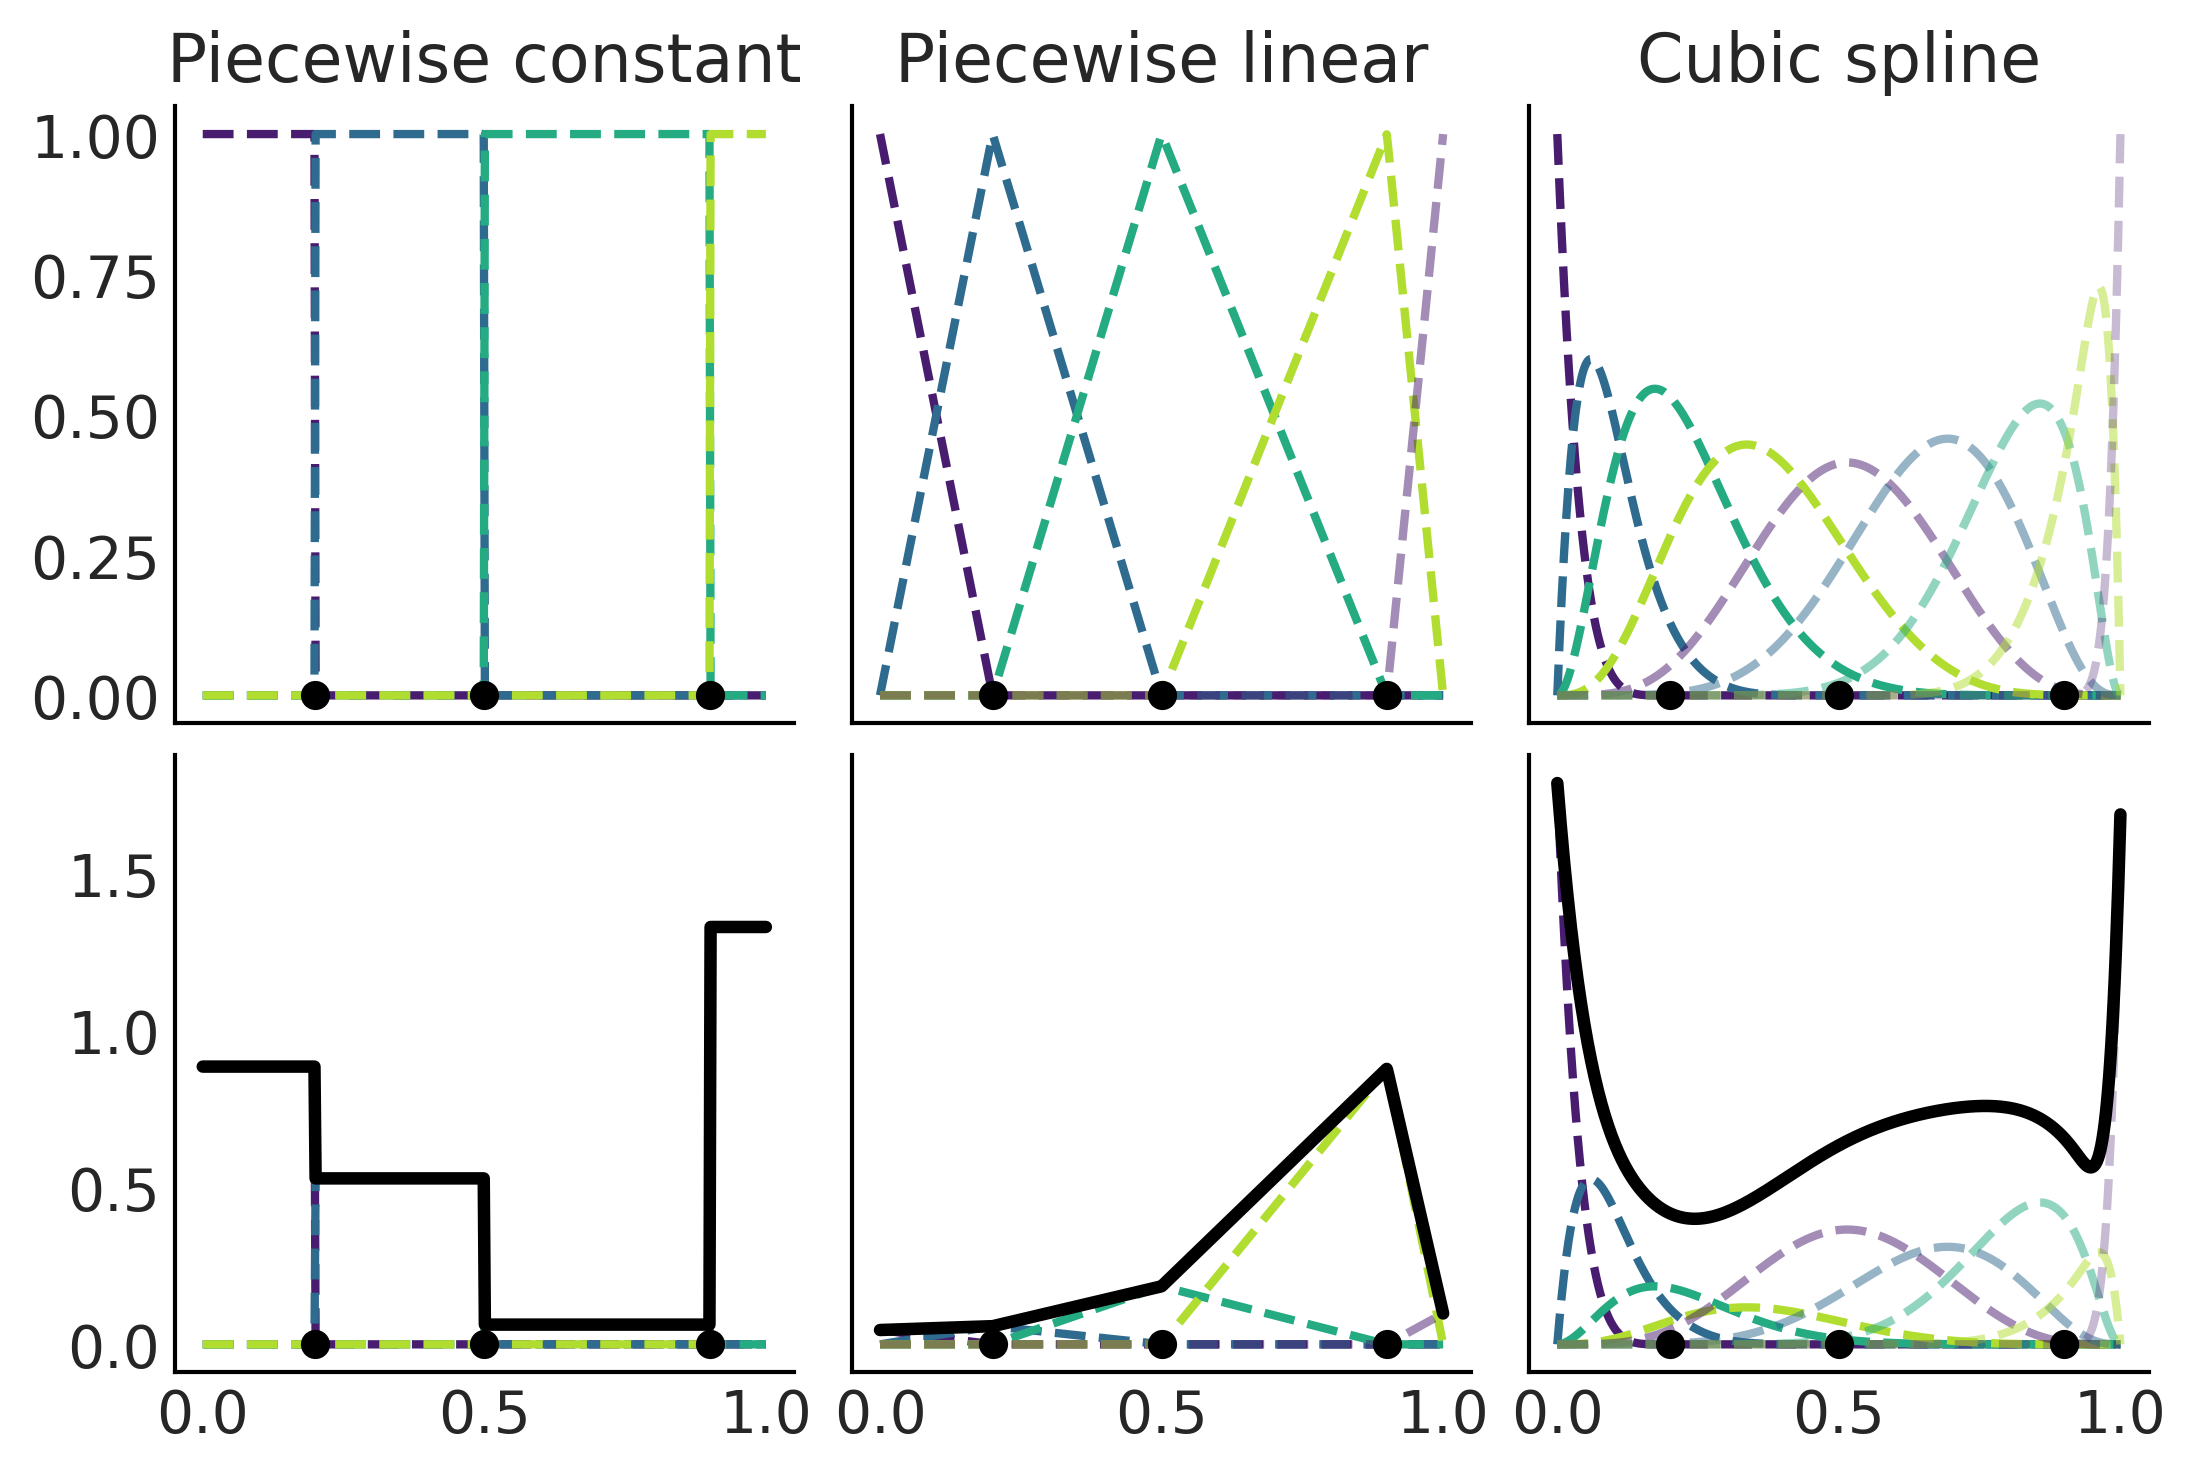

In [ ]:
%matplotlib inline
import arviz as az
import matplotlib.pyplot as plt
from cycler import cycler
import numpy as np
import pandas as pd

import pymc3 as pm
from scipy import stats
from patsy import bs, dmatrix

#from scripts.splines import splines


az.style.use('arviz-grayscale')
plt.rcParams["figure.dpi"] = 300
np.random.seed(435)
viridish = [(0.2823529411764706, 0.11372549019607843, 0.43529411764705883, 1.0),
            (0.1843137254901961, 0.4196078431372549, 0.5568627450980392, 1.0),
            (0.1450980392156863, 0.6705882352941176, 0.5098039215686274, 1.0),
            (0.6901960784313725, 0.8666666666666667, 0.1843137254901961, 1.0),
            (0.2823529411764706, 0.11372549019607843, 0.43529411764705883, 0.5),
            (0.1843137254901961, 0.4196078431372549, 0.5568627450980392, 0.5),
            (0.1450980392156863, 0.6705882352941176, 0.5098039215686274, 0.5),
            (0.6901960784313725, 0.8666666666666667, 0.1843137254901961, 0.5),
            (0.2823529411764706, 0.11372549019607843, 0.43529411764705883, 0.3),
            (0.1843137254901961, 0.4196078431372549, 0.5568627450980392, 0.3),
            (0.1450980392156863, 0.6705882352941176, 0.5098039215686274, 0.3),
            (0.6901960784313725, 0.8666666666666667, 0.1843137254901961, 0.3)]


_, axes = plt.subplots(2, 3, sharex=True, sharey="row")
for idx, (B, title) in enumerate(zip((B0, B1, B3),
                                     ("Piecewise constant",
                                      "Piecewise linear",
                                      "Cubic spline"))):
    # plot spline basis functions
    for i in range(B.shape[1]):
        axes[0, idx].plot(x, B[:, i],color=viridish[i], lw=2, ls="--")
    # we generate some positive random coefficients
    # there is nothing wrong with negative values
    β = np.abs(np.random.normal(0, 1, size=B.shape[1]))
    # plot spline basis functions scaled by its β
    for i in range(B.shape[1]):
        axes[1, idx].plot(x, B[:, i]*β[i],color=viridish[i], lw=2, ls="--")
    # plot the sum of the basis functions
    axes[1, idx].plot(x, np.dot(B, β), color="k", lw=3)
    # plot the knots
    axes[0, idx].plot(knots, np.zeros_like(knots), "ko")
    axes[1, idx].plot(knots, np.zeros_like(knots), "ko")
    axes[0, idx].set_title(title)

Text(0, 0.5, 'Points')

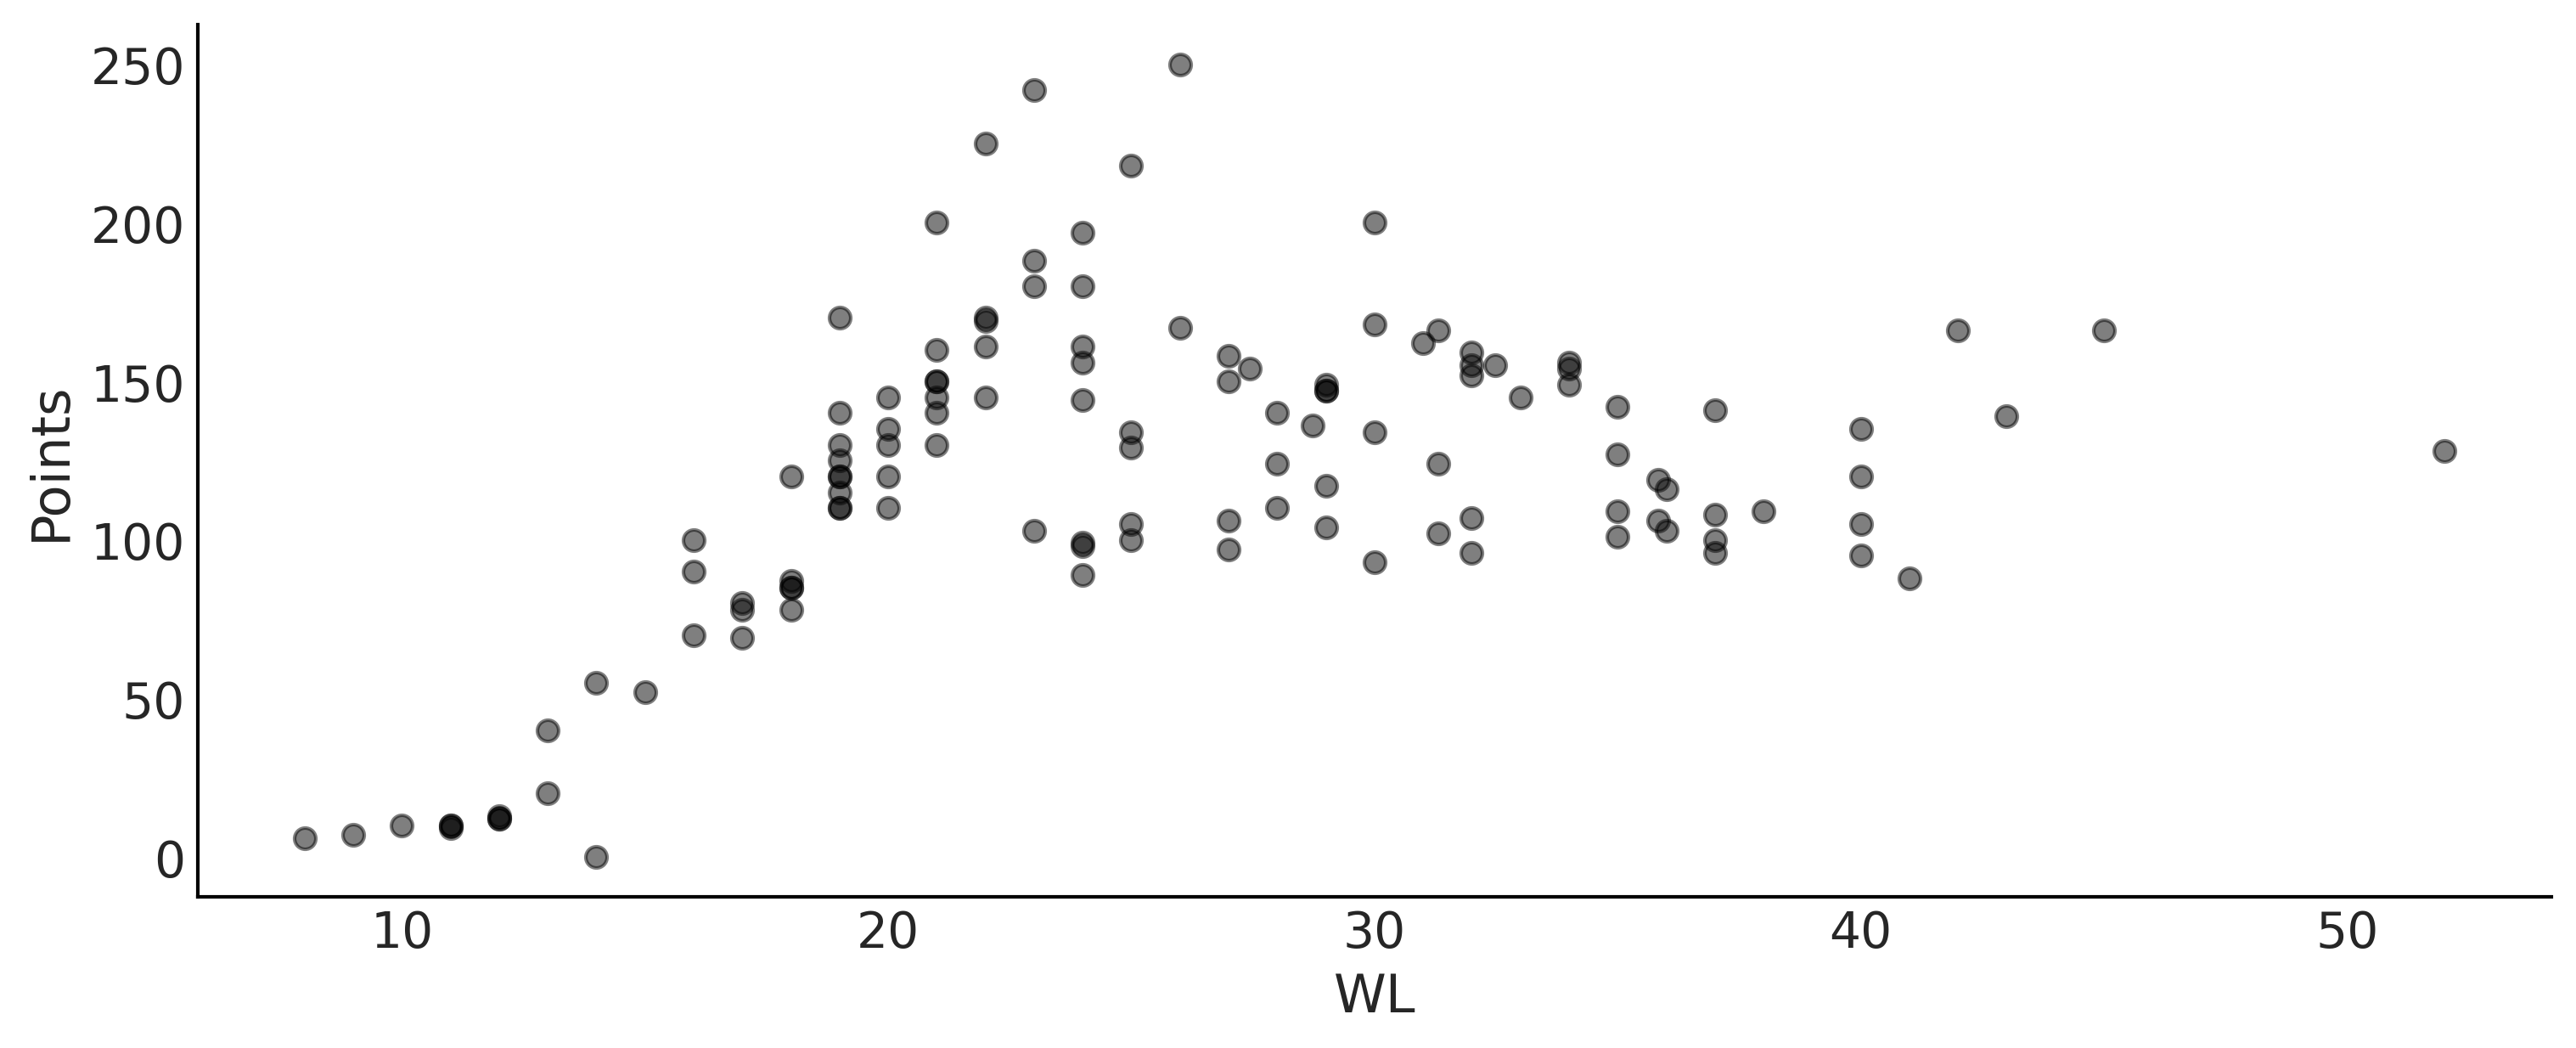

In [ ]:
_,ax=plt.subplots(1,1,figsize=(10,4))
ax.plot(X_train_clean.WL,y_train,"o",alpha=0.5)
ax.set_xlabel("WL")
ax.set_ylabel("Points")

In [ ]:
from patsy import dmatrix


In [ ]:
X_spline=dmatrix('bs(x,df=5,degree=3,include_intercept=False)',{'x':X_train_clean.WL},return_type='dataframe')

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
spline_fit=sm.GLM(y_train,X_spline).fit()

In [ ]:
spline_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Points   No. Observations:                  124
Model:                            GLM   Df Residuals:                      118
Model Family:                Gaussian   Df Model:                            5
Link Function:               identity   Scale:                          852.00
Method:                          IRLS   Log-Likelihood:                -591.22
Date:                Sat, 22 Oct 2022   Deviance:                   1.0054e+05
Time:                        09:13:01   Pearson chi2:                 1.01e+05
No. Iterations:                     3   Pseudo R-squ. (CS):             0.8576
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                            15.9884     20.490      0.780      0.435     -24.172      56.149
bs(x, df=5, degree=3, include_intercept=False)[0]   -57.1608     36.188     -1.580      0.114    -128.089      13.767
bs(x, df=5, degree=3, include_intercept=False)[1]   185.0043     19.936      9.280      0.000     145.930     224.079
bs(x, df=5, degree=3, include_intercept=False)[2]    79.3525     29.998      2.645      0.008      20.557     138.148
bs(x, df=5, degree=3, include_intercept=False)[3]   118.3053     30.658      3.859      0.000      58.217     178.394
bs(x, df=5, degree=3, include_intercept=False)[4]   121.1303     35.437      3.418      0.001      51.675     190.585
=====================================================================================================================
"""

In [ ]:
spline_fit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                  Results: Generalized linear model
=====================================================================================================
Model:                            GLM                          AIC:                        1194.4468 
Link Function:                    identity                     BIC:                        99966.6995
Dependent Variable:               Points                       Log-Likelihood:             -591.22   
Date:                             2022-10-22 09:13             LL-Null:                    -712.07   
No. Observations:                 124                          Deviance:                   1.0054e+05
Df Model:                         5                            Pearson chi2:               1.01e+05  
Df Residuals:                     118                          Scale:                      852.00    
Method:                           IRLS                                                               
-----------------------------------------------------------------------------------------------------
                                                   Coef.   Std.Err.    z    P>|z|    [0.025   0.975] 
-----------------------------------------------------------------------------------------------------
Intercept                                          15.9884  20.4903  0.7803 0.4352  -24.1718  56.1486
bs(x, df=5, degree=3, include_intercept=False)[0] -57.1608  36.1884 -1.5795 0.1142 -128.0887  13.7672
bs(x, df=5, degree=3, include_intercept=False)[1] 185.0043  19.9364  9.2797 0.0000  145.9297 224.0789
bs(x, df=5, degree=3, include_intercept=False)[2]  79.3525  29.9984  2.6452 0.0082   20.5566 138.1484
bs(x, df=5, degree=3, include_intercept=False)[3] 118.3053  30.6579  3.8589 0.0001   58.2168 178.3937
bs(x, df=5, degree=3, include_intercept=False)[4] 121.1303  35.4369  3.4182 0.0006   51.6751 190.5854
=====================================================================================================

"""

In [ ]:
X_spline=dmatrix('bs(x,df=6,degree=3,include_intercept=True)',{'x':X_train_clean.WL},return_type='dataframe')
spline_fit_2=sm.GLM(y_train,X_spline).fit()
spline_fit_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Points   No. Observations:                  124
Model:                            GLM   Df Residuals:                      118
Model Family:                Gaussian   Df Model:                            5
Link Function:               identity   Scale:                          852.00
Method:                          IRLS   Log-Likelihood:                -591.22
Date:                Sat, 22 Oct 2022   Deviance:                   1.0054e+05
Time:                        09:13:03   Pearson chi2:                 1.01e+05
No. Iterations:                     3   Pseudo R-squ. (CS):             0.8576
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           77.5088      4.520     17.149      0.000      68.651      86.367
bs(x, df=6, degree=3, include_intercept=True)[0]   -61.5205     19.206     -3.203      0.001     -99.163     -23.878
bs(x, df=6, degree=3, include_intercept=True)[1]  -118.6813     20.504     -5.788      0.000    -158.868     -78.495
bs(x, df=6, degree=3, include_intercept=True)[2]   123.4839     13.370      9.236      0.000      97.280     149.688
bs(x, df=6, degree=3, include_intercept=True)[3]    17.8320     18.391      0.970      0.332     -18.214      53.878
bs(x, df=6, degree=3, include_intercept=True)[4]    56.7848     25.769      2.204      0.028       6.278     107.292
bs(x, df=6, degree=3, include_intercept=True)[5]    59.6098     25.491      2.339      0.019       9.649     109.570
====================================================================================================================
"""

In [ ]:
spline_fit_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                  Results: Generalized linear model
=====================================================================================================
Model:                            GLM                          AIC:                        1194.4468 
Link Function:                    identity                     BIC:                        99966.6995
Dependent Variable:               Points                       Log-Likelihood:             -591.22   
Date:                             2022-10-22 09:13             LL-Null:                    -712.07   
No. Observations:                 124                          Deviance:                   1.0054e+05
Df Model:                         5                            Pearson chi2:               1.01e+05  
Df Residuals:                     118                          Scale:                      852.00    
Method:                           IRLS                                                               
-----------------------------------------------------------------------------------------------------
                                                   Coef.   Std.Err.    z    P>|z|    [0.025   0.975] 
-----------------------------------------------------------------------------------------------------
Intercept                                          77.5088   4.5196 17.1495 0.0000   68.6506  86.3671
bs(x, df=6, degree=3, include_intercept=True)[0]  -61.5205  19.2057 -3.2032 0.0014  -99.1628 -23.8781
bs(x, df=6, degree=3, include_intercept=True)[1] -118.6813  20.5036 -5.7883 0.0000 -158.8676 -78.4949
bs(x, df=6, degree=3, include_intercept=True)[2]  123.4839  13.3698  9.2360 0.0000   97.2795 149.6882
bs(x, df=6, degree=3, include_intercept=True)[3]   17.8320  18.3913  0.9696 0.3323  -18.2143  53.8783
bs(x, df=6, degree=3, include_intercept=True)[4]   56.7848  25.7694  2.2036 0.0276    6.2778 107.2918
bs(x, df=6, degree=3, include_intercept=True)[5]   59.6098  25.4906  2.3385 0.0194    9.6492 109.5704
=====================================================================================================

"""

In [ ]:
y_pred_train=spline_fit.predict(dmatrix('bs(x,df=5,degree=3,include_intercept=False)',{'x':X_train_clean.WL},return_type='dataframe'))

rmse_train=np.sqrt(mean_squared_error(y_train,y_pred_train))
print(rmse_train)
print(r2_score(y_train,y_pred_train))


28.474025053933524
0.6718144863200379


In [ ]:
y_pred_test=spline_fit.predict(dmatrix('bs(x,df=5,degree=3,include_intercept=False)',{'x':test.WL},return_type='dataframe'))

rmse_test=np.sqrt(mean_squared_error(y_test,y_pred_test))
print(rmse_test)
print(r2_score(y_test,y_pred_test))


38.854150717618005
0.6088059330966564


In [ ]:
y_pred_test=spline_fit_2.predict(dmatrix('bs(x,df=6,degree=3,include_intercept=True)',{'x':test.WL},return_type='dataframe'))

rmse_test=np.sqrt(mean_squared_error(y_test,y_pred_test))
print(rmse_test)
print(r2_score(y_test,y_pred_test))

38.854150717618055
0.6088059330966555


In [ ]:
comparison=pd.concat([X_train_clean.WL,y_train,y_pred_train],axis=1)
comparison.columns=['WL','Real/Actual Points','Fitted Points']
print(comparison)

           WL  Real/Actual Points  Fitted Points
56  24.000000                  98     157.407754
34  38.000000                 109     122.933872
81  18.000000                  85     106.374772
35  13.000000                  40      23.768667
66  19.000000                 140     122.286052
..        ...                 ...            ...
70  23.000000                 103     156.784100
84  19.000000                 125     122.286052
63  16.000000                  90      71.327079
8   27.435544                 154     146.241725
53  25.000000                 105     155.808879

[124 rows x 3 columns]


In [ ]:
comparison=pd.concat([test.WL,y_test,y_pred_test],axis=1)
comparison.columns=['WL','Real/Actual Points','Predicted Points']
print(comparison)

            WL  Real/Actual Points  Predicted Points
130  33.000000                 141        126.116729
123  39.000000                 162        123.584846
3    26.000000                 159        146.719949
152  11.000000                  10          3.849667
133  36.000000                 117        122.019985
112  34.000000                 167        123.966954
27   33.000000                 162        126.116729
115  35.000000                 150        122.632398
40   19.000000                   0         93.842428
65   18.000000                 150         75.961829
14   29.000000                 148        140.048067
153  11.000000                  10          3.849667
74   14.000000                  40         11.001922
62   14.000000                  60         11.001922
45   21.000000                 160        122.981341
140  48.000000                 109        137.118664
44   21.000000                 145        122.981341
21   28.725631                 168        140.

In [ ]:
#Plotting the spline

range_pred=np.linspace(np.min(X_train_clean.WL),np.max(X_train_clean.WL),50)
prediction=spline_fit.predict(dmatrix('bs(xp,df=5,degree=3,include_intercept=False)',{'xp':range_pred},return_type='dataframe'))

In [ ]:
prediction

0      15.988390
1       7.435030
2       2.537428
3       0.942535
4       2.297305
5       6.248689
6      12.443640
7      20.529110
8      30.152051
9      40.959416
10     52.598156
11     64.715224
12     76.957573
13     88.972154
14    100.405919
15    110.905822
16    120.118814
17    127.716456
18    133.656377
19    138.080769
20    141.134897
21    142.964028
22    143.713429
23    143.528367
24    142.554108
25    140.935920
26    138.819067
27    136.348818
28    133.670439
29    130.929196
30    128.270357
31    125.839187
32    123.780954
33    122.239653
34    121.283039
35    120.860693
36    120.912031
37    121.376468
38    122.193420
39    123.302301
40    124.642528
41    126.153516
42    127.774680
43    129.445436
44    131.105199
45    132.693385
46    134.149409
47    135.412686
48    136.422633
49    137.118664
dtype: float64

[]

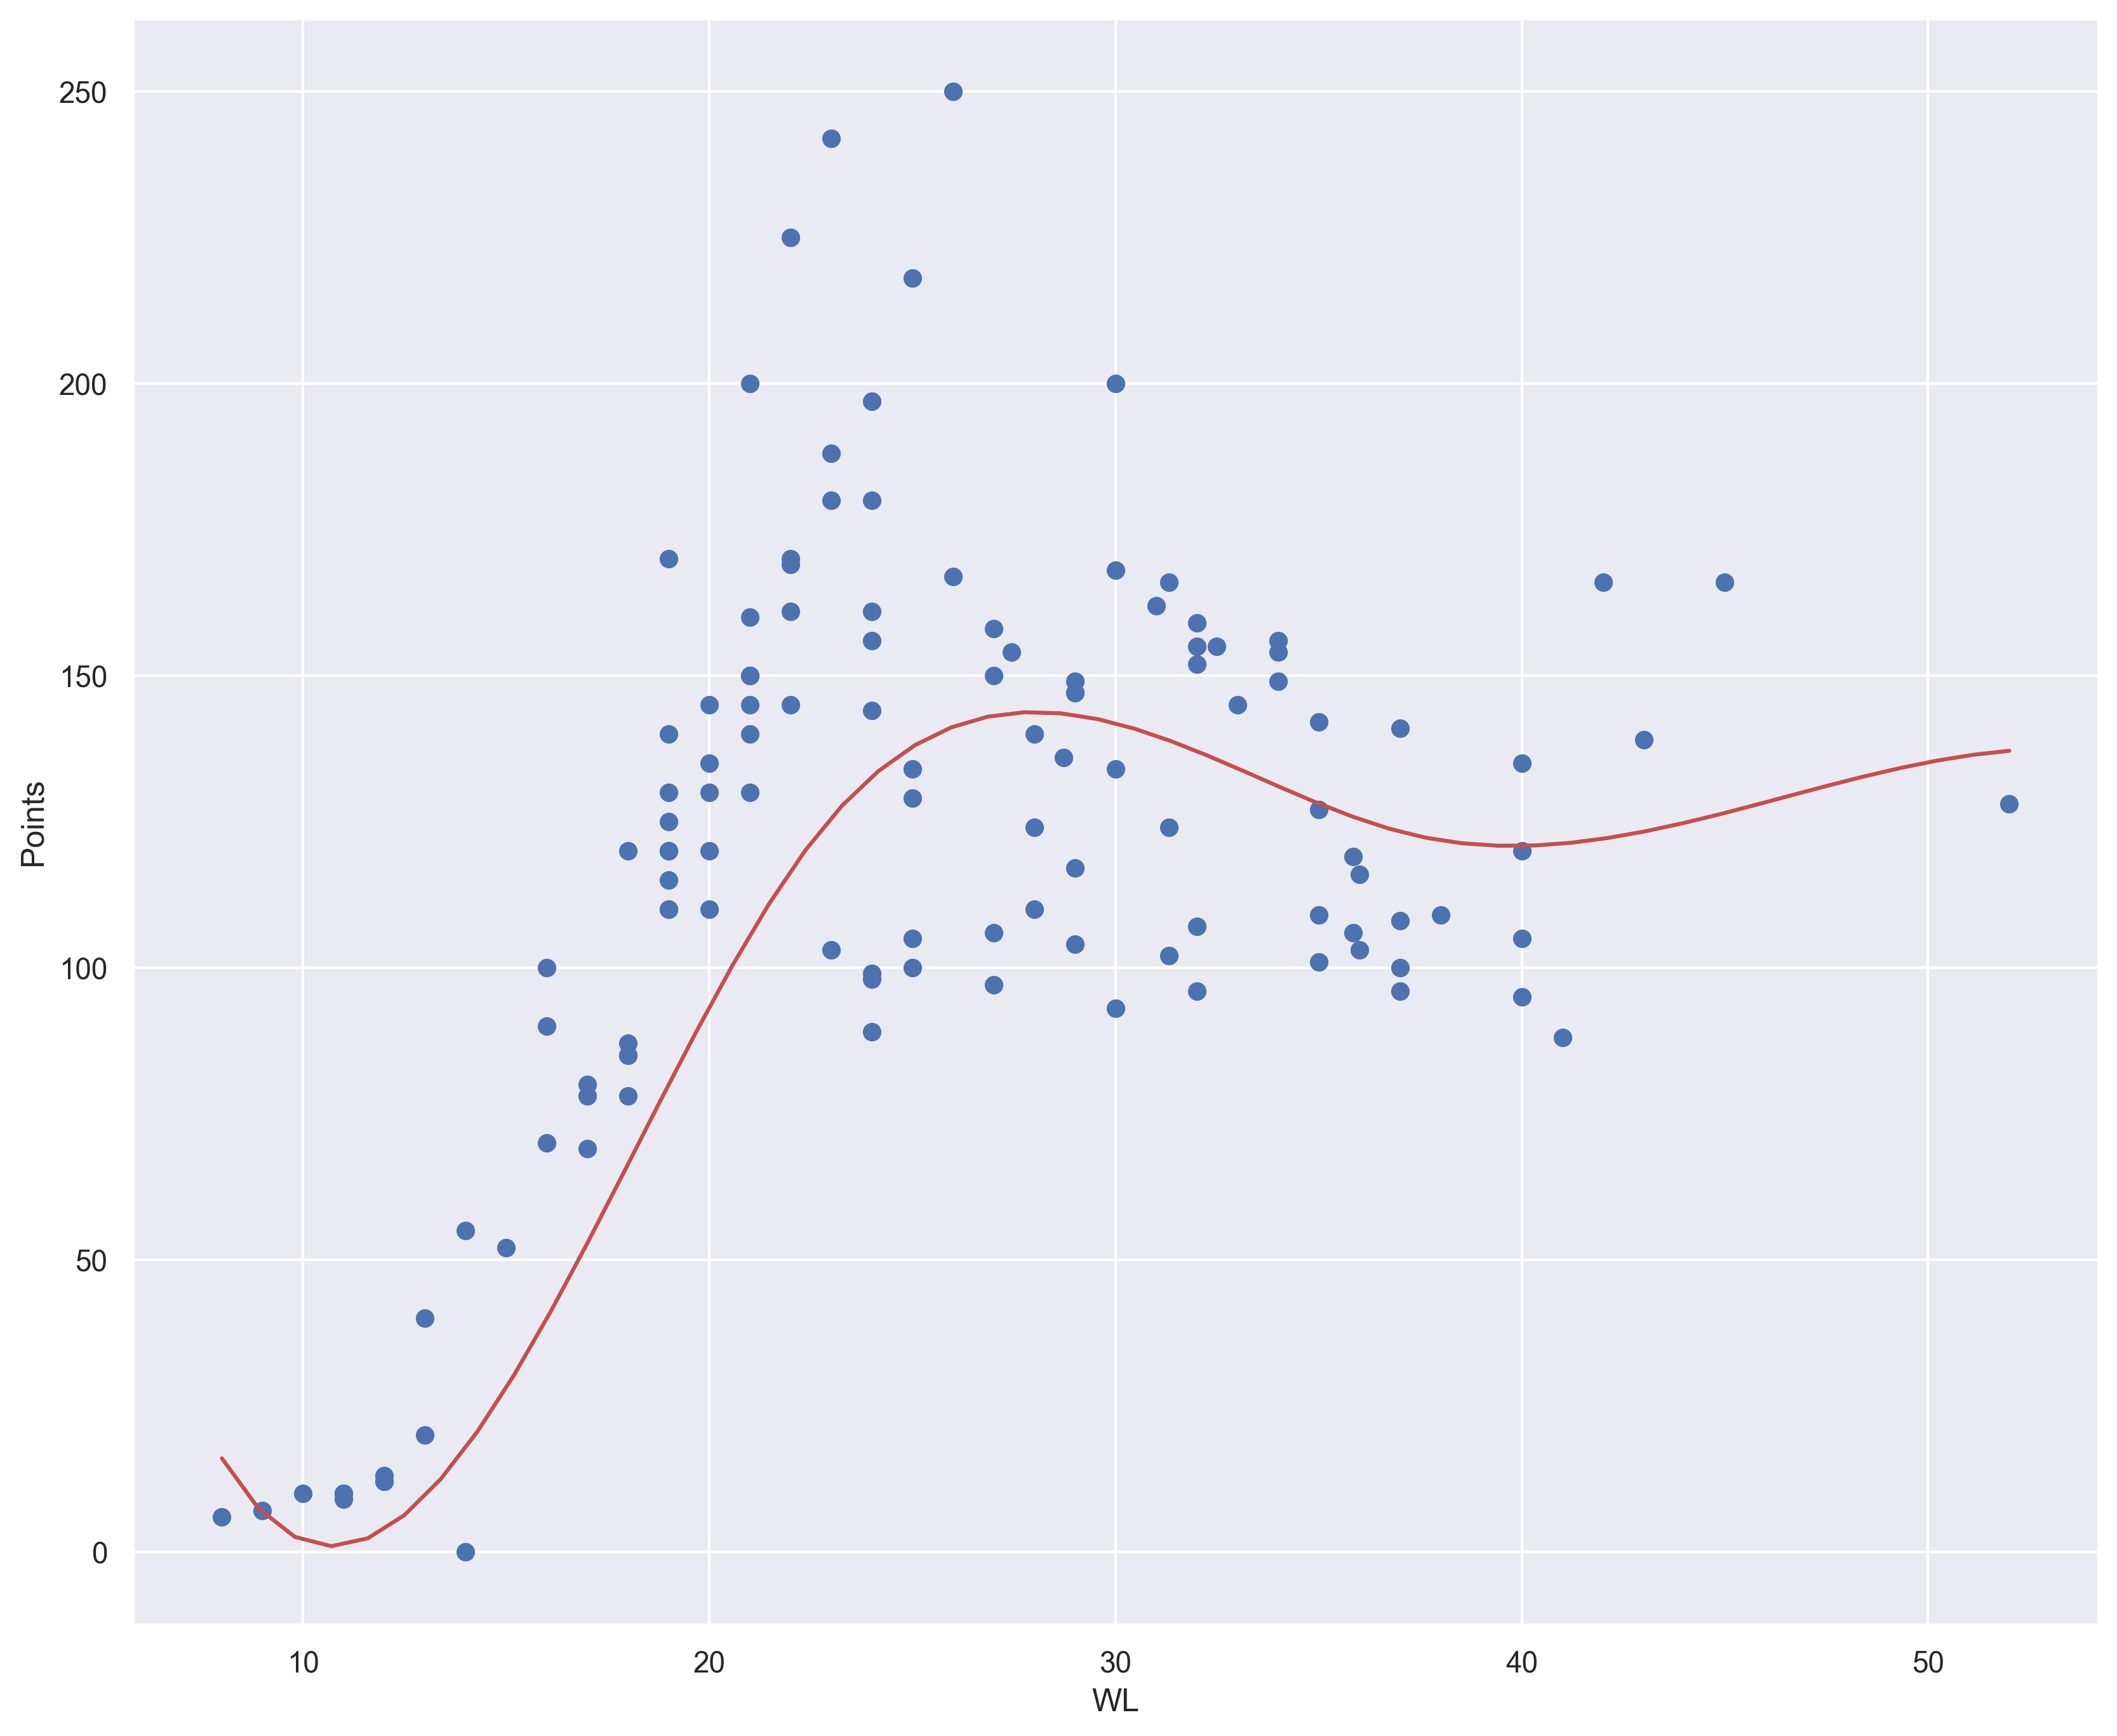

In [ ]:
sns.set(rc={'figure.figsize':(11,9)})
plt.scatter(X_train_clean.WL,y_train,marker='o')
plt.plot(range_pred,prediction,color='r',label='5 knots and 3 degrees')
plt.xlabel('WL')
plt.ylabel('Points')
plt.plot()


Applying splines on 2 variables for surface smoothing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from csaps import csaps

np.random.seed(1234)
xdata = [np.linspace(-3, 8, 41), np.linspace(-2.5, 6.5, 31)]


i, j = np.meshgrid(*xdata, indexing='ij')




In [ ]:
xdata

[array([-3.   , -2.725, -2.45 , -2.175, -1.9  , -1.625, -1.35 , -1.075,
        -0.8  , -0.525, -0.25 ,  0.025,  0.3  ,  0.575,  0.85 ,  1.125,
         1.4  ,  1.675,  1.95 ,  2.225,  2.5  ,  2.775,  3.05 ,  3.325,
         3.6  ,  3.875,  4.15 ,  4.425,  4.7  ,  4.975,  5.25 ,  5.525,
         5.8  ,  6.075,  6.35 ,  6.625,  6.9  ,  7.175,  7.45 ,  7.725,
         8.   ]),
 array([-2.5, -2.2, -1.9, -1.6, -1.3, -1. , -0.7, -0.4, -0.1,  0.2,  0.5,
         0.8,  1.1,  1.4,  1.7,  2. ,  2.3,  2.6,  2.9,  3.2,  3.5,  3.8,
         4.1,  4.4,  4.7,  5. ,  5.3,  5.6,  5.9,  6.2,  6.5])]

In [ ]:
j

array([[-2.5, -2.2, -1.9, ...,  5.9,  6.2,  6.5],
       [-2.5, -2.2, -1.9, ...,  5.9,  6.2,  6.5],
       [-2.5, -2.2, -1.9, ...,  5.9,  6.2,  6.5],
       ...,
       [-2.5, -2.2, -1.9, ...,  5.9,  6.2,  6.5],
       [-2.5, -2.2, -1.9, ...,  5.9,  6.2,  6.5],
       [-2.5, -2.2, -1.9, ...,  5.9,  6.2,  6.5]])

In [ ]:
ydata = (3 * (1 - j)**2. * np.exp(-(j**2) - (i + 1)**2)
         - 10 * (j / 5 - j**3 - i**5) * np.exp(-j**2 - i**2)
         - 1 / 3 * np.exp(-(j + 1)**2 - i**2))
ydata = ydata + (np.random.randn(*ydata.shape) * 0.75)



In [ ]:
#Max number of rows, 2nd variable columns --->

In [ ]:
ydata_s = csaps(xdata, ydata, xdata, smooth=0.988)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


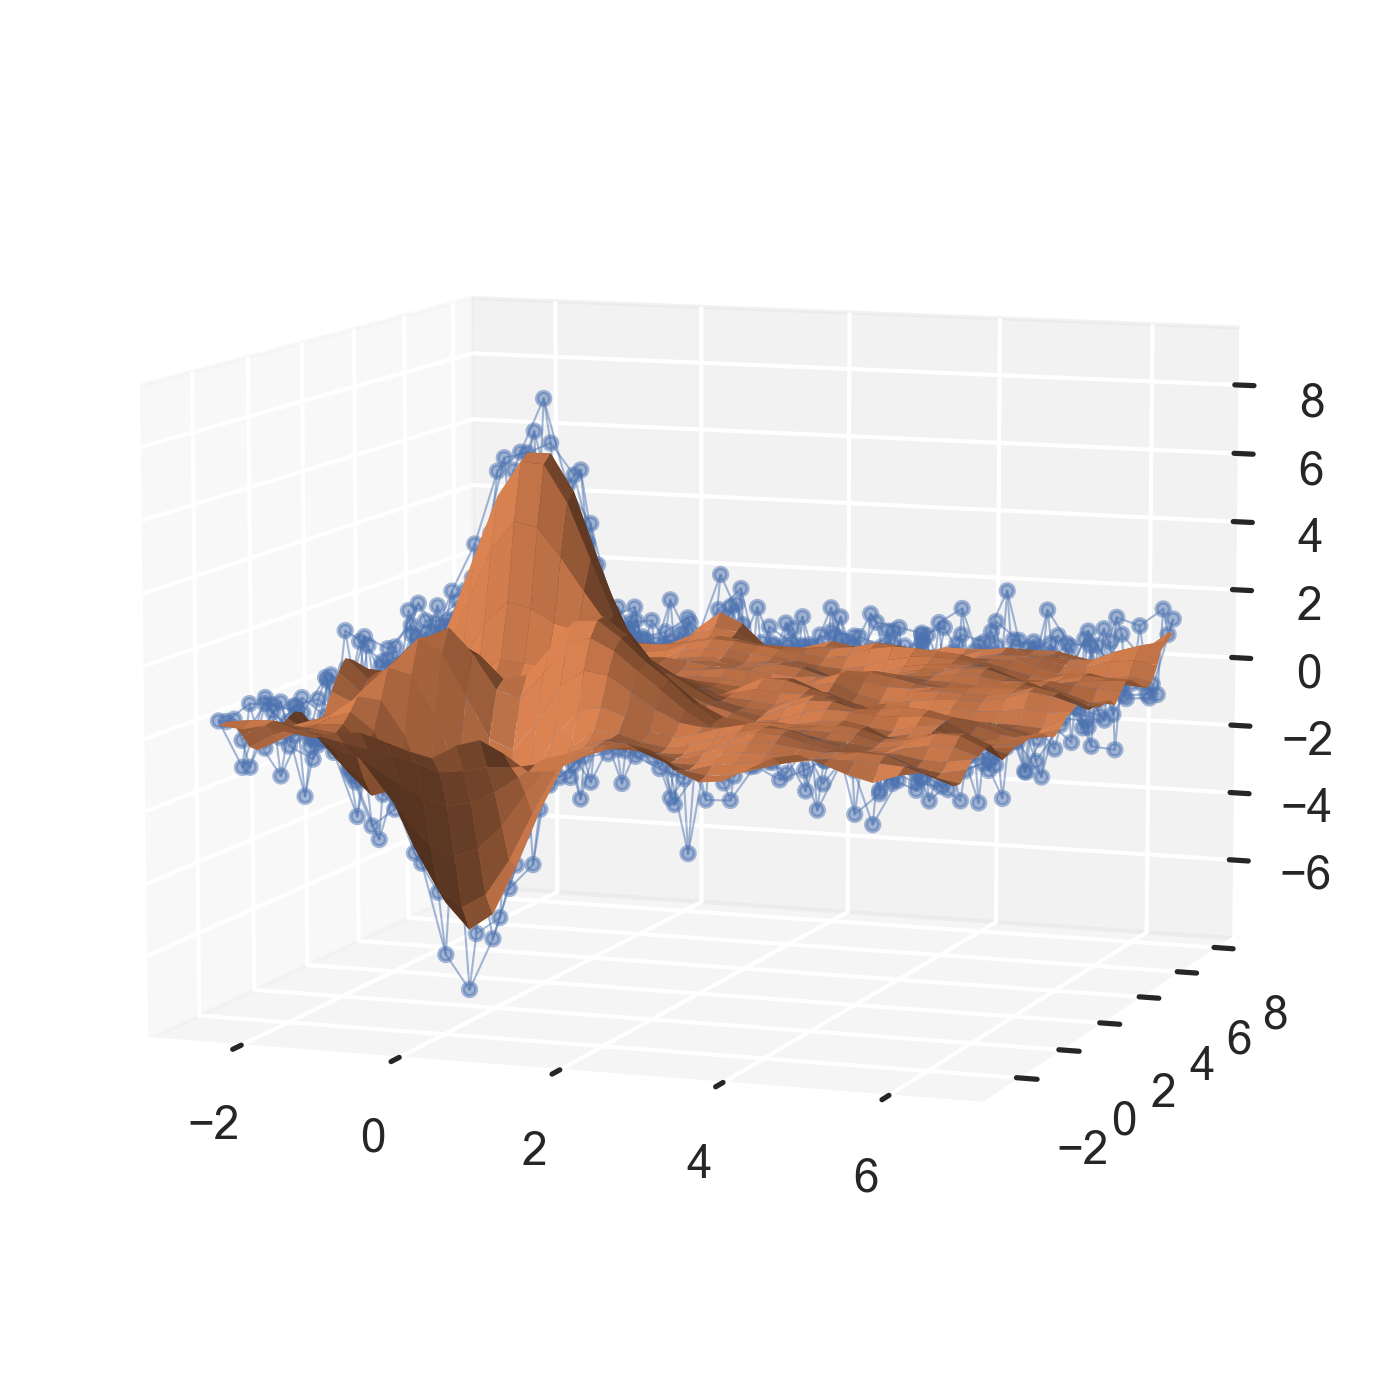

In [ ]:

fig = plt.figure(figsize=(7, 4.5))
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('none')
c = [s['color'] for s in plt.rcParams['axes.prop_cycle']]
ax.plot_wireframe(j, i, ydata, linewidths=0.5, color=c[0], alpha=0.5)
ax.scatter(j, i, ydata, s=10, c=c[0], alpha=0.5)
ax.plot_surface(j, i, ydata_s, color=c[1], linewidth=0, alpha=1.0)
ax.view_init(elev=9., azim=290)

plt.show()

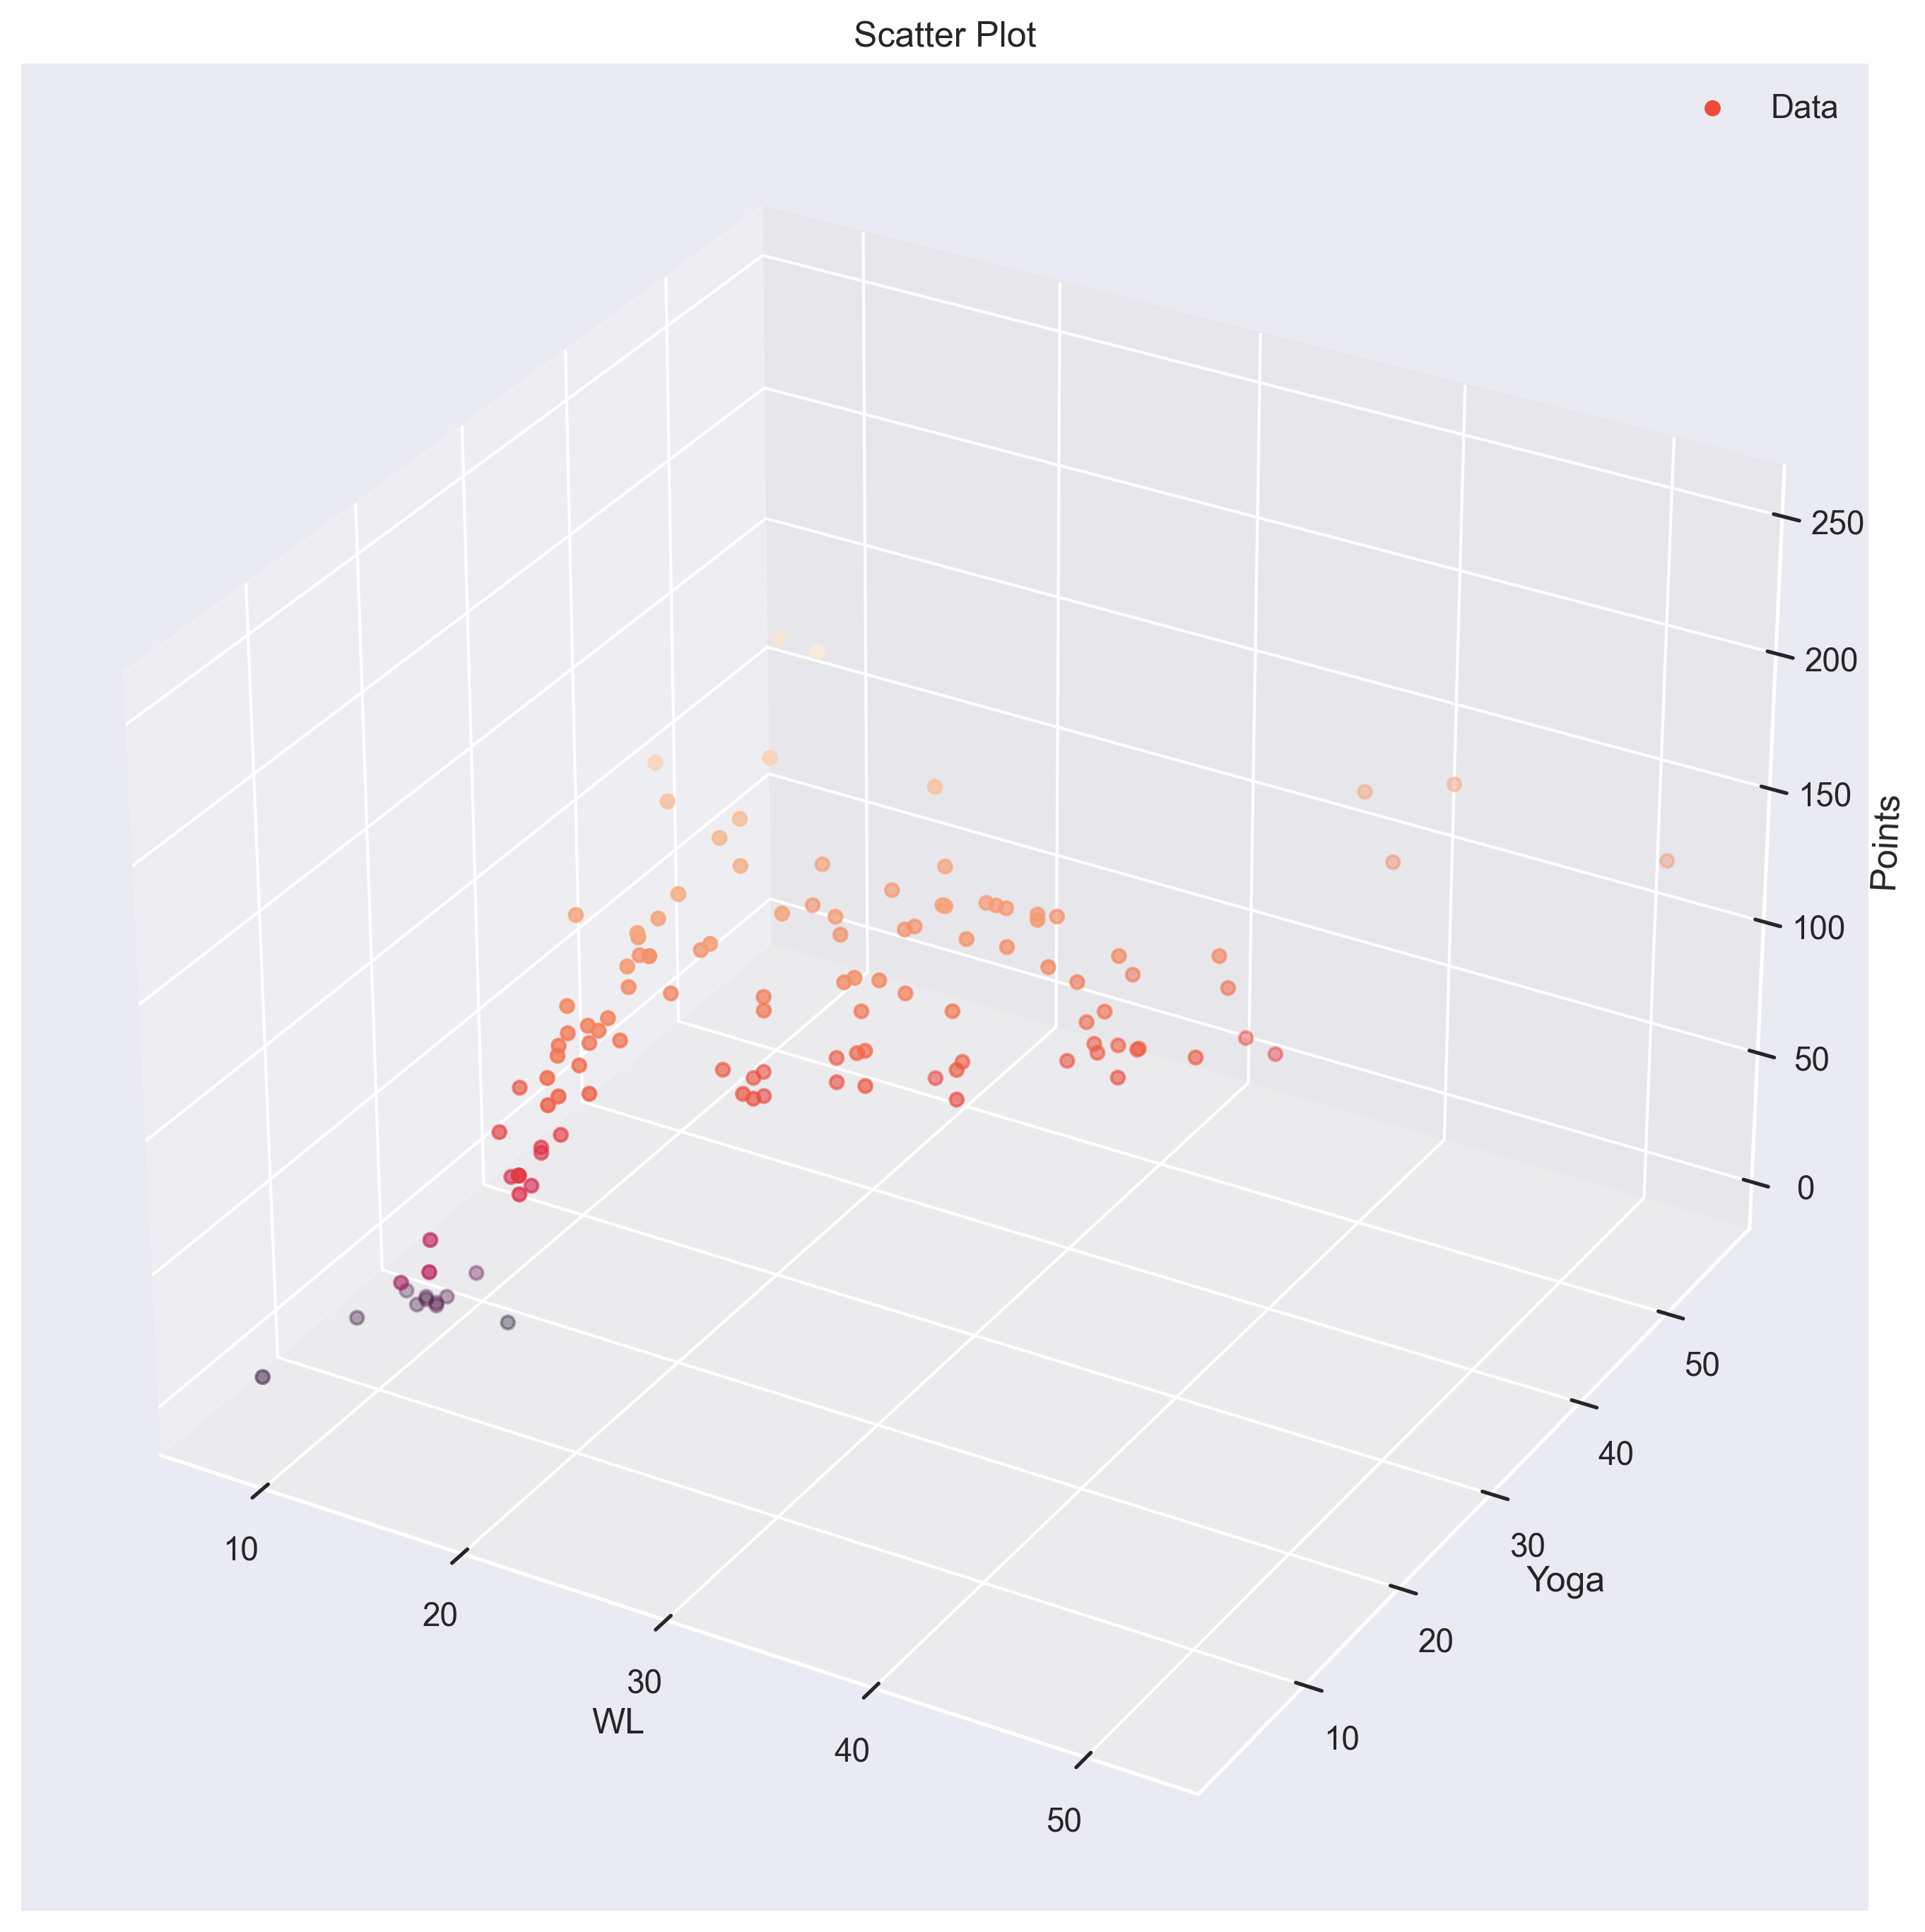

In [ ]:
#Plot the data
fig1=plt.figure(figsize=(9,9))
ax=fig1.add_subplot(projection='3d')
ax.scatter(X_train_clean.WL,
           X_train_clean.Yoga,
           y_train,
           c=np.sqrt(y_train),
           label='Data')

ax.set_title('Scatter Plot')
ax.set_xlabel('WL')
ax.set_ylabel('Yoga')
ax.set_zlabel('Points')

plt.legend(loc='upper right')
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, SplineTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

In [ ]:
spline_model=make_pipeline(SplineTransformer(n_knots=5,degree=3),LinearRegression())

In [ ]:
spline_model.fit(X_train_clean[['WL','Yoga']],y_train)

Pipeline(steps=[('splinetransformer', SplineTransformer()),
                ('linearregression', LinearRegression())])

In [ ]:
spline_model.predict(X_train_clean[['WL','Yoga']])

array([158.44293104, 117.04845933, 109.7132563 ,  16.55938854,
       125.23269482, 120.17059999, 136.70990106,   6.39290484,
        10.77045423, 144.13854995, 134.34508976, 149.06287288,
       152.08574118, 120.17059999, 177.49482914,  19.46147661,
       125.23269482, 129.73928642, 117.76435112, 123.73834626,
       175.15256633, 135.03326144, 125.46637713, 146.27733528,
       128.94319897, 125.44425308, 130.92988434, 173.58602335,
       125.56096613,  35.53388237, 100.91744788, 149.1682315 ,
       124.23989141, 143.49275874, 109.7132563 , 124.70911222,
       135.81096318,  20.87180282, 153.86571705, 109.7132563 ,
       149.06287288, 128.94319897, 146.4603802 , 103.16733063,
       145.04778159, 129.6993996 , 135.72058775, 146.31266368,
        72.9419432 , 126.39411112, 149.06287288, 136.63903418,
       117.97869044, 148.76400548,  92.06284913, 145.80988848,
        92.06284913, 128.70998419, 136.24417035,  44.66449318,
       129.82557053, 142.33476937,  73.4655258 , 132.05

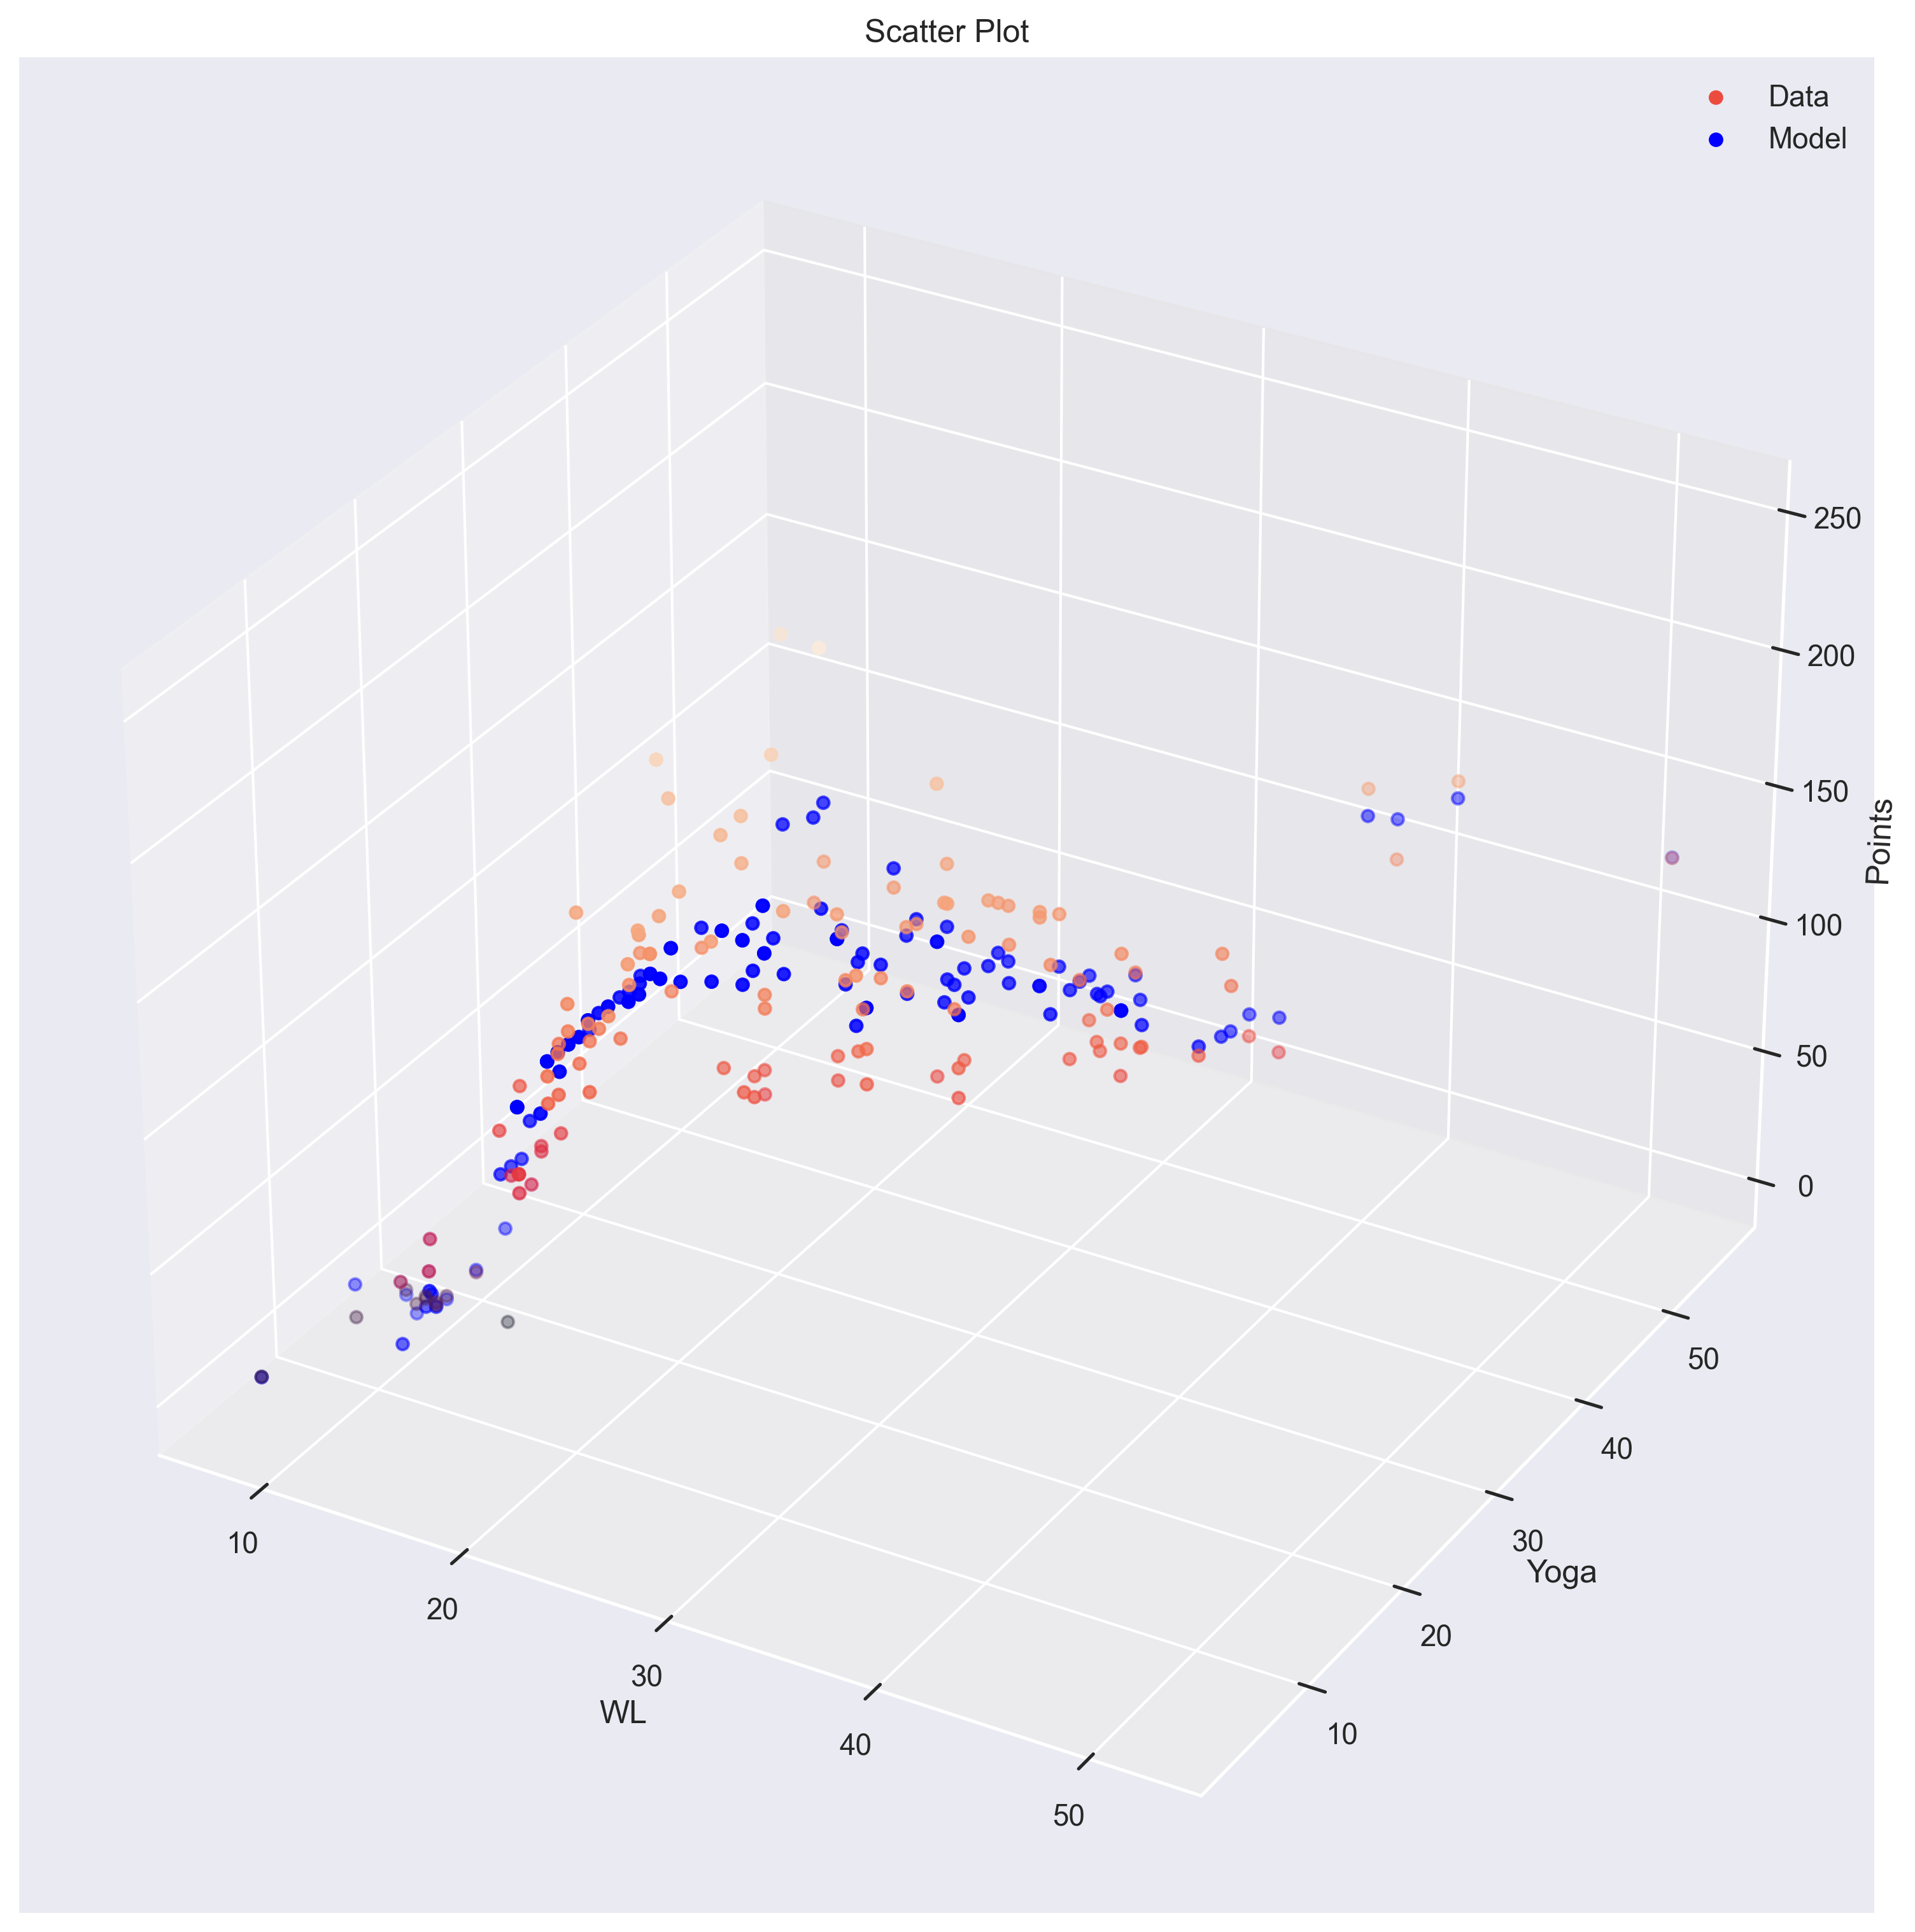

In [ ]:
#Plot the data
fig2=plt.figure(figsize=(10,10))
ax=fig2.add_subplot(projection='3d')
ax.scatter(X_train_clean.WL,
           X_train_clean.Yoga,
           y_train,
           c=np.sqrt(y_train),
           label='Data')

ax.scatter(X_train_clean.WL,
           X_train_clean.Yoga,
           spline_model.predict(X_train_clean[['WL','Yoga']]),
           c='blue',
           label='Model')

ax.set_title('Scatter Plot')
ax.set_xlabel('WL')
ax.set_ylabel('Yoga')
ax.set_zlabel('Points')

plt.legend(loc='upper right')

ax=plt.gca()

plt.show()

In [ ]:
y_pred=spline_model.predict(test[['WL','Yoga']])

In [ ]:
y_pred

array([128.58762152, 111.35060987, 172.09283608,   6.39290484,
       122.64233256, 124.92429653, 133.4750825 , 125.59802367,
       124.70911222, 110.64133982, 135.5878804 ,   5.93417504,
        26.99327289,  34.33635857, 142.96917615, -58.9542832 ,
       142.49995533, 147.64115376, 135.25136694, 161.18036263,
       122.81061227, 133.4750825 ,   8.90222288, 108.36795126,
       144.92742473, 147.83018849, 120.24307108,  12.16600738,
         8.90222288, 139.84009068, 116.04904672, 135.25136694])

In [ ]:
rmse_test=np.sqrt(mean_squared_error(y_test,y_pred))
print(rmse_test)
print(r2_score(y_test,y_pred))

45.63721630807454
0.46029590788785024


In [ ]:
###Points which are bugging us:

#1) Too many models -Answer
#2) Keeping track of metrics- Answer
#3) Splines cant be viewed in more than 3 dimensions --> No solution
#4) How do you know which spline is fitting the data best? -> Solve

In [ ]:
#Let us jet off to Mars!
#Multivariate adaptive regression splines

MARS ---> **Multivariate adaptive regression splines**

In [ ]:
!pip install git+https://github.com/scikit-learn-contrib/py-earth@v0.2dev

In [ ]:
from sklearn.model_selection import RepeatedKFold,cross_val_score
from pyearth import Earth

In [ ]:
#define the model
#cross validation
#evaluate it with the help of metric
#results

#predictions


In [ ]:
model=Earth()
cv=RepeatedKFold(n_splits=5,n_repeats=3,random_state=12)
scores=cross_val_score(model, X_train_clean,y_train,scoring='neg_root_mean_squared_error',cv=cv,n_jobs=-1)




In [ ]:
??Earth

Init signature:
Earth(
    max_terms=None,
    max_degree=None,
    allow_missing=False,
    penalty=None,
    endspan_alpha=None,
    endspan=None,
    minspan_alpha=None,
    minspan=None,
    thresh=None,
    zero_tol=None,
    min_search_points=None,
    check_every=None,
    allow_linear=None,
    use_fast=None,
    fast_K=None,
    fast_h=None,
    smooth=None,
    enable_pruning=True,
    feature_importance_type=None,
    verbose=0,
)
Source:        
class Earth(BaseEstimator, RegressorMixin, TransformerMixin):

    """
    Multivariate Adaptive Regression Splines

    A flexible regression method that automatically searches for interactions
    and non-linear relationships.  Earth models can be thought of as
    linear models in a higher dimensional basis space
    (specifically, a multivariate truncated power spline basis).
    Each term in an Earth model is a product of so called "hinge functions".
    A hinge function is a function that's equal to its argument where that
   

In [ ]:
model=Earth(max_degree=8,allow_linear ='True',endspan=20)


In [ ]:
model.fit(X_train_clean,y_train)
model.score(X_train_clean,y_train)


0.6791928689377809

In [ ]:
print(model.summary())

Earth Model
-----------------------------------------------------------
Basis Function                        Pruned  Coefficient  
-----------------------------------------------------------
(Intercept)                           No      116.317      
h(Laps-41)                            Yes     None         
h(41-Laps)                            No      -7.55857     
Laps*h(41-Laps)                       No      0.206741     
Team_Clippers*h(41-Laps)              Yes     None         
Team_Porcupines                       No      26.9938      
Team_Lakers*Laps*h(41-Laps)           Yes     None         
WI*h(41-Laps)                         No      0.986631     
WI*Team_Porcupines                    Yes     None         
Team_Trailblazers*WI*h(41-Laps)       Yes     None         
Yoga*Team_Trailblazers*WI*h(41-Laps)  No      0.0429951    
PAFS*Team_Clippers*h(41-Laps)         Yes     None         
PAFS                                  Yes     None         
h(PAFS-6)                   

In [ ]:
y_pred=model.predict(test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6307086460751969

In [ ]:
from sklearn.metrics import mean_squared_error

print(np.sqrt(mean_squared_error(y_test, y_pred)))

37.75077403124405
